<h1 align="center"> Job Salary Analysis </h1>  

## Introduction:
- This project aims to help job seekers interested in data scientist and data analyst positions to determine the target location and employers. The data is about the [salary of the data scientist and data analyst H1B sponsored job from January to September of 2020](https://h1bdata.info/index.php?em=&job=data&city=&year=2020).                                  
- This project starts with web scrapping from the original website and subset the data into hiring information about data scientists and data analysts. Three datasets were analyzed in this project: the dataset includes data scientists and data analysts, the dataset of data scientists, and the dataset of data analysts.                 
- To help job applicants identify the employers, locations with most job opportunities, the analysis process includes identifying the relationship among salary, employers, locations, as well as case status. 

## Goal
- Use beautiful soup package scrap raw data from the target website.
- Clean the scrapped data and correct the formats of the variable for further analysis. 
- Identify and remove the outliers.
- Subset cleaned dataset into the dataset of data scientists and dataset of the data analyst.
- Understand the salary distribution of the data related job, data scientist positions, and data analyst positions.
- Identify the most hiring employers, the most hiring states, and most hiring cities.
- Identify the most paying employers, the most paying states, and most paying cities.
- Use bar charts, crosstabs, treemaps, swarm plots to aid the data presentation.


## Outline
- <b>1. Web Crawl</b>    
 - 1.1 Crawb the raw data    
 - 1.2 Keep related data
 - 1.3 Scrape Data
 - 1.4 Correct Format
     - 1.4.1 Salary
     - 1.4.2 Location
     - 1.4.3 Case Status
 - 1.5 Detect and remove outlier
 - 1.6 Subset DS data and DA data
     - 1.6.1 Data Scientist
     - 1.6.2 Data Analyst
     
- <b>2. Overview Analysis</b>    
 - 2.1 Salary Analysis
     - 2.1.1 Salary Distribution
     - 2.1.2 Top 10 Highest Paying Employers
     - 2.1.3 Number of Hiring by Top 10 Highest Paying Employers
     - 2.1.4 Top 10 Highest Paying States
     - 2.1.5 Number of Hiring by Top 10 Highest Paying States
     - 2.1.6 Top 10 Highest Paying Cities
     - 2.1.7 Number of Hiring by Top 10 Highest Paying Cities
     - 2.1.8 Average Salary by Case Status     
     - 2.1.9 Average Salary of Top 10 Highest Paying Employers by Case Status
     - 2.1.10 Average Salary of Top 10 Highest Paying State by Case Status    
     - 2.1.11 Average Salary of Top 10 Highest Paying Cities by Case Status
 - 2.2 Location Analysis
     - 2.2.1 Location of Top 10 Highest Hiring Employers
     - 2.2.2 Location of Top 10 Highest Hiring States
     - 2.2.3 Location of Top 10 Highest Hiring Cities
 - 2.3 Case Status Analysis
     - 2.3.1 Top 10 States by Case Status
     - 2.3.2 Case Status and Base Salary of Top 10 Hiring Employers
     - 2.3.3 Case Status and Base Salary of Top 10 Hiring States
     - 2.3.4 Case Status and Base Salary of Top 10 Hiring Cities
- <b>3. Analysis of Scientist and Data Analyst</b>  
 - 3.1 Salary Distribution
     - 3.1.1 Salary Distribution
     - 3.1.2 Top 10 Highest Paying Employers
     - 3.1.3 Average Salary of Top 10 Highest Paying Employers
     - 3.1.4 Number of Hiring by Top 10 Highest Paying Employers
     - 3.1.5 Top 10 Highest Paying State
     - 3.1.6 Average Salary of Top 10 Highest Paying States
     - 3.1.7 Number of Hiring by Top 10 Highest Paying States
     - 3.1.8 Top 10 Highest Paying Cities
     - 3.1.9 Average Salary of Top 10 Highest Paying Cities     
     - 3.1.10 Number of Hiring by Top 10 Highest Paying Cities
     - 3.1.11 Average Salary by Case Status
     - 3.1.12 Average Salary of Top 10 Highest Paying Employers by Case Status    
     - 3.1.13 Average Salary of Top 10 Highest Paying States by Case Status
     - 3.1.14 Average Salary of Top 10 Highest Paying Cities by Case Status
 - 3.2 Location Analysis     
     - 3.2.1 Location of Top 10 Highest Hiring Employers
     - 3.2.2 Location of Top 10 Highest Hiring States
     - 3.2.3 Location of Top 10 Highest Hiring Cities     
 - 3.3 Case Status Analysis
     - 3.3.1 Top 10 Hiring States by Case Status
     - 3.3.2 Average Salary of Top 10 Hiring States by Case Status
     - 3.3.3 Average Salary of Top 10 Hiring Cities by Case Status     

## 1. Web Crawl
- In this section, we will first use the beautiful soup package to scrap the raw data from the website. 
- The cleaning data process include:
    1. correct the salary data type from string to integer
    2. Parse location data into state and city.
    3. correct the various name of the value in state and case status variable.
    4. detect and remove the outliers of the dataset.
    5. split the dataset into the dataset of data scientists and dataset of data analysts


### 1.1 Crawb the raw data
Firstly we are going to import requests library. Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor.

In [1]:
# import all libraries needed for this project
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile
from scipy import stats
from IPython.display import display, HTML
from seaborn import countplot
from matplotlib.pyplot import figure, show
import squarify 

In [2]:
# Scrape raw data from website
website_raw = requests.get('https://h1bdata.info/index.php?em=&job=data&city=&year=2020').text

In [3]:
# take a look at the raw data
print(website_raw[0:500])
print(len(website_raw))

<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8">
<script data-ezscrex='false' data-cfasync='false' data-pagespeed-no-defer>var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=false;__ez.queue=(function(){var count=0,incr=0,items=[],timeDelayFired=false,hpItems=[],lpItems=[],allowLoad=true;var obj={func:function(name,funcName,param
7461497


At this moment, we srape 7,453,537 data, but we only need data that related to job salary.

### 1.2 Keep related data     
We begin by reading the source code for a given web page and creating a BeautifulSoup (soup)object with the BeautifulSoup function. Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping. Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_raw, 'html.parser')
tb = soup.find('table',{'id':'myTable'})
temp = tb.find_all('td')
temp

[<td><a href="index.php?em=PYRAMID+CONSULTING+INC&amp;job=DATA&amp;city=&amp;year=2020">PYRAMID CONSULTING INC</a></td>,
 <td><a href="index.php?em=&amp;job=DATA++TECHNICAL+ANALYST&amp;city=&amp;year=2020">DATA  TECHNICAL ANALYST</a></td>,
 <td>92,872</td>,
 <td><a href="index.php?em=&amp;job=DATA&amp;city=ALPHARETTA&amp;year=2020">ALPHARETTA, GEORGIA</a></td>,
 <td>04/05/2020</td>,
 <td>10/01/2020</td>,
 <td>CERTIFIED</td>,
 <td><a href="index.php?em=ALIGN+TECHNOLOGY+INC&amp;job=DATA&amp;city=&amp;year=2020">ALIGN TECHNOLOGY INC</a></td>,
 <td><a href="index.php?em=&amp;job=DATA+%26+ANALYTICS+ENGINEER&amp;city=&amp;year=2020">DATA &amp; ANALYTICS ENGINEER</a></td>,
 <td>110,000</td>,
 <td><a href="index.php?em=&amp;job=DATA&amp;city=SAN+JOSE&amp;year=2020">SAN JOSE, CALIFORNIA</a></td>,
 <td>03/27/2020</td>,
 <td>09/01/2020</td>,
 <td>CERTIFIED</td>,
 <td><a href="index.php?em=FIREEYE+INC&amp;job=DATA&amp;city=&amp;year=2020">FIREEYE INC</a></td>,
 <td><a href="index.php?em=&amp;job=D

### 1.3 Scrape Data
In above step, we kept the related section, and in this section we will scrap the data we are interested in.

In [5]:
dt = []
for element in temp:
    dt.append(element.get_text())
print(dt)

['PYRAMID CONSULTING INC', 'DATA  TECHNICAL ANALYST', '92,872', 'ALPHARETTA, GEORGIA', '04/05/2020', '10/01/2020', 'CERTIFIED', 'ALIGN TECHNOLOGY INC', 'DATA & ANALYTICS ENGINEER', '110,000', 'SAN JOSE, CALIFORNIA', '03/27/2020', '09/01/2020', 'CERTIFIED', 'FIREEYE INC', 'DATA & ANALYTICS ENGINEER', '135,512', 'MILPITAS, CALIFORNIA', '03/04/2020', '09/03/2020', 'CERTIFIED', 'AMERITAS LIFE INSURANCE CORP', 'DATA & ANALYTICS MANAGER', '105,000', 'CINCINNATI, OHIO', '05/05/2020', '05/08/2020', 'CERTIFIED', 'AMERITAS LIFE INSURANCE CORP', 'DATA & ANALYTICS MANAGER', '110,000', 'CINCINNATI, OHIO', '05/01/2020', '05/08/2020', 'CERTIFIED', 'OPENSOURCE TECHNOLOGIES INC', 'DATA & ANALYTICS SPECIALIST', '75,462', 'LANSDALE, PENNSYLVANIA', '04/23/2020', '10/01/2020', 'CERTIFIED', 'BLUENET TECHNOLOGIES INC', 'DATA & ANALYTICS SPECIALIST', '85,000', 'ROLLING MEADOWS, ILLINOIS', '01/27/2020', '02/24/2020', 'CERTIFIED', 'PROJECT MANAGEMENT INSTITUTE INC', 'DATA & ANALYTICS SPECIALIST I', '91,800', 'N

In [6]:
Employer = dt[::7]
Job_Title = dt[1::7]
Base_Salary = dt[2::7]
Location = dt[3::7]
Submit_Date = dt[4::7]
Start_Date = dt[5::7]
Case_Status = dt[6::7]

In [7]:
df = pd.DataFrame()
df['Employer']=Employer
df['JobTitle']=Job_Title
df['BaseSalary']=Base_Salary
df['Location']=Location
df['CaseStatus']=Case_Status
df.head()

# The data is H1B job for 2020 and the Date is not the interest of this project, so here we ignore the data variables
# df['Submit Date']=Submit_Date 
# df['Start Date']=Start_Date

Employer                   JobTitle BaseSalary  \
0        PYRAMID CONSULTING INC    DATA  TECHNICAL ANALYST     92,872   
1          ALIGN TECHNOLOGY INC  DATA & ANALYTICS ENGINEER    110,000   
2                   FIREEYE INC  DATA & ANALYTICS ENGINEER    135,512   
3  AMERITAS LIFE INSURANCE CORP   DATA & ANALYTICS MANAGER    105,000   
4  AMERITAS LIFE INSURANCE CORP   DATA & ANALYTICS MANAGER    110,000   

               Location CaseStatus  
0   ALPHARETTA, GEORGIA  CERTIFIED  
1  SAN JOSE, CALIFORNIA  CERTIFIED  
2  MILPITAS, CALIFORNIA  CERTIFIED  
3      CINCINNATI, OHIO  CERTIFIED  
4      CINCINNATI, OHIO  CERTIFIED

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Employer    9802 non-null   object
 1   JobTitle    9802 non-null   object
 2   BaseSalary  9802 non-null   object
 3   Location    9802 non-null   object
 4   CaseStatus  9802 non-null   object
dtypes: object(5)
memory usage: 383.0+ KB


In total we scrap 9802 data for H1B sponosred job related to data.

### 1.4 Correct Format

#### a) Salary

In [9]:
type(df.BaseSalary[0])

str

The data type of salary is string, however, it supposed to be integer data type.

In [10]:
#remove comma from the value
s=[]
for i in df.BaseSalary:
    i = i.replace(',','')
    s.append(i)
    
#convert base_salary to int
BaseSalary = list(map(int, s)) 
type(BaseSalary[0])

int

Now the data type of salary is interger.

In [11]:
#replace the original value
df['BaseSalary'] = BaseSalary
df.head()

Employer                   JobTitle  BaseSalary  \
0        PYRAMID CONSULTING INC    DATA  TECHNICAL ANALYST       92872   
1          ALIGN TECHNOLOGY INC  DATA & ANALYTICS ENGINEER      110000   
2                   FIREEYE INC  DATA & ANALYTICS ENGINEER      135512   
3  AMERITAS LIFE INSURANCE CORP   DATA & ANALYTICS MANAGER      105000   
4  AMERITAS LIFE INSURANCE CORP   DATA & ANALYTICS MANAGER      110000   

               Location CaseStatus  
0   ALPHARETTA, GEORGIA  CERTIFIED  
1  SAN JOSE, CALIFORNIA  CERTIFIED  
2  MILPITAS, CALIFORNIA  CERTIFIED  
3      CINCINNATI, OHIO  CERTIFIED  
4      CINCINNATI, OHIO  CERTIFIED

#### b) Location
The location data is better parse into state and city. It will help for futhur analysis such as most hiring states and most paying states, etc.

In [12]:
# split by comma
split_data = df['Location'].str.split(', ')
data = split_data.to_list()
new_df = pd.DataFrame(data)
new_df

0            1     2
0     ALPHARETTA      GEORGIA  None
1       SAN JOSE   CALIFORNIA  None
2       MILPITAS   CALIFORNIA  None
3     CINCINNATI         OHIO  None
4     CINCINNATI         OHIO  None
...          ...          ...   ...
9797   PRINCETON   NEW JERSEY  None
9798   PRINCETON   NEW JERSEY  None
9799   PRINCETON   NEW JERSEY  None
9800    STAFFORD        TEXAS  None
9801     SHELTON  CONNECTICUT  None

[9802 rows x 3 columns]

The location data is expected to parse into 2 parts, however, we got 3 parts. Let's do an investigation.

In [13]:
new_df.columns = ['City', 'State', 'Unknown']
print('Number of states:', len(new_df.State.unique()))
new_df['Unknown'].value_counts()

Number of states: 51


DISTRICT OF COLUMBIA    5
Name: Unknown, dtype: int64

In [14]:
new_df.loc[new_df['Unknown']=='DISTRICT OF COLUMBIA']

City State               Unknown
1830  WASHINGTON    DC  DISTRICT OF COLUMBIA
1837  WASHINGTON  D.C.  DISTRICT OF COLUMBIA
1852  WASHINGTON  D.C.  DISTRICT OF COLUMBIA
3281  WASHINGTON  D.C.  DISTRICT OF COLUMBIA
5116  WASHINGTON    DC  DISTRICT OF COLUMBIA

It looks like 5 jobs that us DC or D.C. as state as well as add full name of the state. So we don't need to worry about the 3rd parse column, but we should fix the DC format.

In [15]:
#correct the DC and D.C. 
new_df.replace("DC", "DISTRICT OF COLUMBIA", inplace=True)
new_df.replace("D.C.", "DISTRICT OF COLUMBIA", inplace=True)
new_df.loc[new_df['Unknown']=='DISTRICT OF COLUMBIA']

City                 State               Unknown
1830  WASHINGTON  DISTRICT OF COLUMBIA  DISTRICT OF COLUMBIA
1837  WASHINGTON  DISTRICT OF COLUMBIA  DISTRICT OF COLUMBIA
1852  WASHINGTON  DISTRICT OF COLUMBIA  DISTRICT OF COLUMBIA
3281  WASHINGTON  DISTRICT OF COLUMBIA  DISTRICT OF COLUMBIA
5116  WASHINGTON  DISTRICT OF COLUMBIA  DISTRICT OF COLUMBIA

In [16]:
print('Number of states after correction:', len(new_df.State.unique()))

Number of states after correction: 49


Now we fixed various of the name of state.             
Now let's reconstructure the data with states and city.

In [17]:
#merge two datasets
df['State']=new_df['State']
df['City']=new_df['City']

df = df[['Employer','JobTitle','BaseSalary','State','City','CaseStatus']]
df.head()

Employer                   JobTitle  BaseSalary  \
0        PYRAMID CONSULTING INC    DATA  TECHNICAL ANALYST       92872   
1          ALIGN TECHNOLOGY INC  DATA & ANALYTICS ENGINEER      110000   
2                   FIREEYE INC  DATA & ANALYTICS ENGINEER      135512   
3  AMERITAS LIFE INSURANCE CORP   DATA & ANALYTICS MANAGER      105000   
4  AMERITAS LIFE INSURANCE CORP   DATA & ANALYTICS MANAGER      110000   

        State        City CaseStatus  
0     GEORGIA  ALPHARETTA  CERTIFIED  
1  CALIFORNIA    SAN JOSE  CERTIFIED  
2  CALIFORNIA    MILPITAS  CERTIFIED  
3        OHIO  CINCINNATI  CERTIFIED  
4        OHIO  CINCINNATI  CERTIFIED

#### c) Case Status

In [18]:
df.CaseStatus.value_counts()

CERTIFIED                9367
CERTIFIED - WITHDRAWN     371
DENIED                     57
WITHDRAWN                   7
Name: CaseStatus, dtype: int64

In [19]:
#merge CERTIFIED-WITHDRAW AND WITHDRAW
df['CaseStatus'] = df['CaseStatus'].replace(['CERTIFIED - WITHDRAWN'],'WITHDRAWN')


# check it again
df.CaseStatus.value_counts()

CERTIFIED    9367
WITHDRAWN     378
DENIED         57
Name: CaseStatus, dtype: int64

### 1.5 Detect and remove outlier

Since we only care about the DS and DA position, the final data will only include DS/DA position.

In [20]:
ds = df[df['JobTitle'].str.match('DATA SCIENTIST')]
print(len(ds))

2689


In [21]:
da = df[df['JobTitle'].str.match('DATA ANALYST')]
print(len(da))

1455


In [22]:
df = pd.concat([ds,da])
#reset index
df.reset_index(drop=True, inplace=True)
df.head()

Employer        JobTitle  BaseSalary  \
0  FORTRESS INFORMATION SECURITY LLC  DATA SCIENTIST       45980   
1             A&Z PHARMACEUTICAL INC  DATA SCIENTIST       62980   
2                       BIOMETRIX CO  DATA SCIENTIST       67980   
3                     COGNOMOTIV INC  DATA SCIENTIST       70880   
4                  POPULUS GROUP LLC  DATA SCIENTIST       72020   

            State          City CaseStatus  
0         FLORIDA       ORLANDO  WITHDRAWN  
1        NEW YORK     HAUPPAUGE  CERTIFIED  
2  NORTH CAROLINA        DURHAM  CERTIFIED  
3      CALIFORNIA    MENLO PARK  CERTIFIED  
4    PENNSYLVANIA  PHILADELPHIA  CERTIFIED

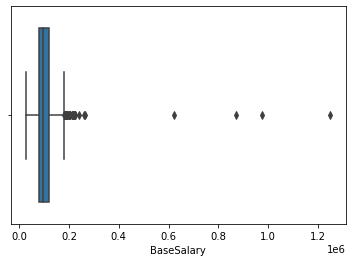

In [23]:
# use boxplot detect outliers
sns.boxplot(x=df.BaseSalary)

In [24]:
# use std decide outliers
df_mean, df_std = mean(df.BaseSalary), std(df.BaseSalary)
cut_off = df_std * 3
lower, upper = df_mean - cut_off, df_mean + cut_off

#identify outliers
df_outliers = [x for x in df.BaseSalary if x < lower or x > upper]
print('Identified outliers: %d' % len(df_outliers))

Identified outliers: 9


In [25]:
#Let's take a look at those 9 outliers
df.sort_values(by='BaseSalary', ascending = False).head(9)

Employer  \
2035                     FACEBOOK INC   
3750                    ROUTE APP INC   
2034                        TAGUP INC   
3749     AUTOMATED HEALTH SYSTEMS INC   
2574                     FACEBOOK INC   
2051                   STITCH FIX INC   
2561  TOYOTA RESEARCH INSTITUTE (TRI)   
2032                   STITCH FIX INC   
2033                   STITCH FIX INC   

                                             JobTitle  BaseSalary  \
2035                                   DATA SCIENTIST     1250000   
3750                                     DATA ANALYST      976698   
2034                                   DATA SCIENTIST      870000   
3749                                     DATA ANALYST      620000   
2574                       DATA SCIENTIST Ã¢ÂÂ ARVR      265000   
2051           DATA SCIENTIST - CLIENT RECOMMENDATION      260000   
2561  DATA SCIENTIST SENIOR MACHINE LEARNING ENGINEER      240000   
2032                                   DATA SCIENTIST      225000   
2033                                   DATA SCIENTIST      225000   

              State           City CaseStatus  
2035     CALIFORNIA     MENLO PARK     DENIED  
3750           UTAH           LEHI     DENIED  
2034  MASSACHUSETTS     SOMERVILLE     DENIED  
3749   PENNSYLVANIA     PITTSBURGH  CERTIFIED  
2574     CALIFORNIA     MENLO PARK  CERTIFIED  
2051     CALIFORNIA  SAN FRANCISCO  CERTIFIED  
2561     CALIFORNIA      LOS ALTOS  CERTIFIED  
2032     CALIFORNIA  SAN FRANCISCO  CERTIFIED  
2033     CALIFORNIA  SAN FRANCISCO  CERTIFIED

In [26]:
#remove those outliers.
df = df.drop([2035,3750,2034,3749,2574,2051,2561,2032,2033])

In [27]:
df.reset_index(drop=True, inplace=True)

print('Number of DS and DA records are:',len(df))
df

Number of DS and DA records are: 4135


Employer                    JobTitle  \
0     FORTRESS INFORMATION SECURITY LLC              DATA SCIENTIST   
1                A&Z PHARMACEUTICAL INC              DATA SCIENTIST   
2                          BIOMETRIX CO              DATA SCIENTIST   
3                        COGNOMOTIV INC              DATA SCIENTIST   
4                     POPULUS GROUP LLC              DATA SCIENTIST   
...                                 ...                         ...   
4130            DYNAMIC ITSOLUTIONS INC             DATA ANALYST-SR   
4131            THE CLIMATE CORPORATION  DATA ANALYST: DATA QUALITY   
4132                 FORD MOTOR COMPANY   DATA ANALYSTICS SCIENTIST   
4133       MARCOÃ¢ÂÂS FRANCHISING LLC               DATA ANALYSTS   
4134              UBER TECHNOLOGIES INC               DATA ANALYSTS   

      BaseSalary           State           City CaseStatus  
0          45980         FLORIDA        ORLANDO  WITHDRAWN  
1          62980        NEW YORK      HAUPPAUGE  CERTIFIED  
2          67980  NORTH CAROLINA         DURHAM  CERTIFIED  
3          70880      CALIFORNIA     MENLO PARK  CERTIFIED  
4          72020    PENNSYLVANIA   PHILADELPHIA  CERTIFIED  
...          ...             ...            ...        ...  
4130       86778        VIRGINIA       RICHMOND  CERTIFIED  
4131       84000        ILLINOIS        CHICAGO  CERTIFIED  
4132       61140        MICHIGAN     SOUTHFIELD  CERTIFIED  
4133       70000            OHIO         TOLEDO  CERTIFIED  
4134      126700      CALIFORNIA  SAN FRANCISCO  CERTIFIED  

[4135 rows x 6 columns]

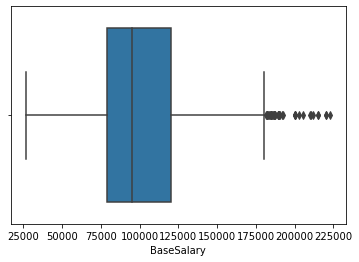

In [28]:
sns.boxplot(x=df.BaseSalary)

This looks much better

In [29]:
# Another way to get outliers - using interquartile range
#q25, q75 = percentile(df.BaseSalary, 25), percentile(df.BaseSalary, 75)
#iqr = q75 - q25
#print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
#cut_off = iqr * 1.5
#lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
#outliers = [x for x in df.BaseSalary if x < lower or x > upper]
#print('Identified outliers: %d' % len(outliers))

### 1.6 Subset DS data and DA data

In this project, DS and DA position is my interest. 2 subsets of dataset will be created.

In [30]:
#let's take a look at job title
df['JobTitle'].value_counts()

DATA SCIENTIST                                      2032
DATA ANALYST                                        1060
DATA SCIENTIST II                                    165
DATA SCIENTIST I                                     135
DATA ANALYST 2                                        74
                                                    ... 
DATA SCIENTIST AI+ML RESEARCHER                        1
DATA SCIENTIST ARCHITECT                               1
DATA SCIENTIST II, CLINICAL INFORMATICS                1
DATA ANALYST, SOLUTIONS                                1
DATA ANALYST BUSINESS INTELLIGENCE BI SPECIALIST       1
Name: JobTitle, Length: 295, dtype: int64

It seems like same DS position has different name, the name of the position doesn't matter, so we will drop the title column.

#### a) Data Scientist

In [31]:
ds = df[df['JobTitle'].str.match('DATA SCIENTIST')]
#drop Job title column
ds = ds.drop(['JobTitle'],axis=1)

#rest index
ds.reset_index(drop=True, inplace=True)
ds

Employer  BaseSalary           State  \
0     FORTRESS INFORMATION SECURITY LLC       45980         FLORIDA   
1                A&Z PHARMACEUTICAL INC       62980        NEW YORK   
2                          BIOMETRIX CO       67980  NORTH CAROLINA   
3                        COGNOMOTIV INC       70880      CALIFORNIA   
4                     POPULUS GROUP LLC       72020    PENNSYLVANIA   
...                                 ...         ...             ...   
2677        FAST SWITCH-GREAT LAKES LLC       94000        MICHIGAN   
2678        FAST SWITCH-GREAT LAKES LLC       94000        MICHIGAN   
2679        FAST SWITCH-GREAT LAKES LLC       93600        MICHIGAN   
2680        FAST SWITCH-GREAT LAKES LLC       96400        MICHIGAN   
2681        FAST SWITCH-GREAT LAKES LLC      104000        MICHIGAN   

              City CaseStatus  
0          ORLANDO  WITHDRAWN  
1        HAUPPAUGE  CERTIFIED  
2           DURHAM  CERTIFIED  
3       MENLO PARK  CERTIFIED  
4     PHILADELPHIA  CERTIFIED  
...            ...        ...  
2677       DETROIT  CERTIFIED  
2678       DETROIT  CERTIFIED  
2679      DEARBORN  CERTIFIED  
2680      DEARBORN  CERTIFIED  
2681      DEARBORN  CERTIFIED  

[2682 rows x 5 columns]

There are total of 2682 DS position

In [32]:
da = df[df['JobTitle'].str.match('DATA ANALYST')]
da = da.drop(['JobTitle'],axis=1)
#rest index
da.reset_index(drop=True, inplace=True)
da

Employer  BaseSalary       State           City  \
0                LTS ASSOCIATE INC       26700       TEXAS     CARROLLTON   
1                   BAPTIST HEALTH       38160    ARKANSAS    LITTLE ROCK   
2                  DOTCOM TEAM LLC       40000   TENNESSEE      NASHVILLE   
3                  DOTCOM TEAM LLC       40000       TEXAS         SPRING   
4                  DOTCOM TEAM LLC       40000   TENNESSEE      NASHVILLE   
...                            ...         ...         ...            ...   
1448       DYNAMIC ITSOLUTIONS INC       86778    VIRGINIA       RICHMOND   
1449       THE CLIMATE CORPORATION       84000    ILLINOIS        CHICAGO   
1450            FORD MOTOR COMPANY       61140    MICHIGAN     SOUTHFIELD   
1451  MARCOÃ¢ÂÂS FRANCHISING LLC       70000        OHIO         TOLEDO   
1452         UBER TECHNOLOGIES INC      126700  CALIFORNIA  SAN FRANCISCO   

     CaseStatus  
0     CERTIFIED  
1     CERTIFIED  
2     CERTIFIED  
3     CERTIFIED  
4     CERTIFIED  
...         ...  
1448  CERTIFIED  
1449  CERTIFIED  
1450  CERTIFIED  
1451  CERTIFIED  
1452  CERTIFIED  

[1453 rows x 5 columns]

There are total of 1453 DA position.            
Looks like DA position is just half of the number of DS position.

-------
-------
-------
-------
-------
-------
-------
-------

## 2. Overview Analysis

### 2.1 Salary Analysis
In this section, we will analyze the salary of the dataset of both data scientists and data analysts position, and ientified information of mosting paying employers, most paying states, most paying cities, average salary by case status.

#### Summary
1.Salary Analysis of the data include both data scientist and data analyst position:
- The salary of the dataset includes both data scientists, and data analyst position follows a normal distribution. 
- The highest mean base salary from the top 10 highest paying employers is from $\$$174,138 - $\$$200,000. However, those top 10 paying employers don't have many hiring records that most hire 1-2 positions.  
- The highest mean base salary from the top 10 highest paying states from $\$$91,850 - $\$$126,634. The number of hiring positions varies from 4 (Idaho) to 1297 (California). 
- The highest mean base salary from the top 10 highest paying cities from $\$$150,000 - $\$$185,000 and those Top 10 highest cities are in 3 states - Massachusetts, California, and New York.  The number of hiring positions varies from 1 to 82.
- There are no withdraw or denial cases from the top 10 highest paying employers and the top 10 highest paying cities.            


2.Location Analysis of the data include both data scientist and data analyst position:
- The top 10 hiring employers are mostly located on the east and west coast of America. 
- Except for the most hiring location of Wal-mart hiring in Arkansas, the rest of the Top 9 hiring employers' most hiring locations are all located on the east or west coast of America. 
- The top 10 hiring employers hire the most position in California, followed by Washington and Arkansas.
- The top 10 hiring employers are Amazon, Facebook, Walmart, Google, Capgemini America, International Business Machines, Paypal, Apple, Insurance Services Office, and Linkedin Corp.
- The Top 10 hiring States are California, New York, Texas, Washinton, Massachusets, Illinois, New Jersey, Pennsylvania, Georgia, and Virginia. 
- The top 10 hiring cities are New York, San Francisco, Seattle, Sunnyvale, Chicago, Mountain View, San Jose, Atlanta, Boston, Menlo Park.


3.Case Status Analysis of data include both data scientist and data analyst positions:
- The more number of certified cases, the more number of withdrawn cases and number of denied cases.
- There are no denial cases in the top 10 hiring employers.

#### 2.1.1 Salary Distribution

Text(0.5, 0, '$ Base Salary')

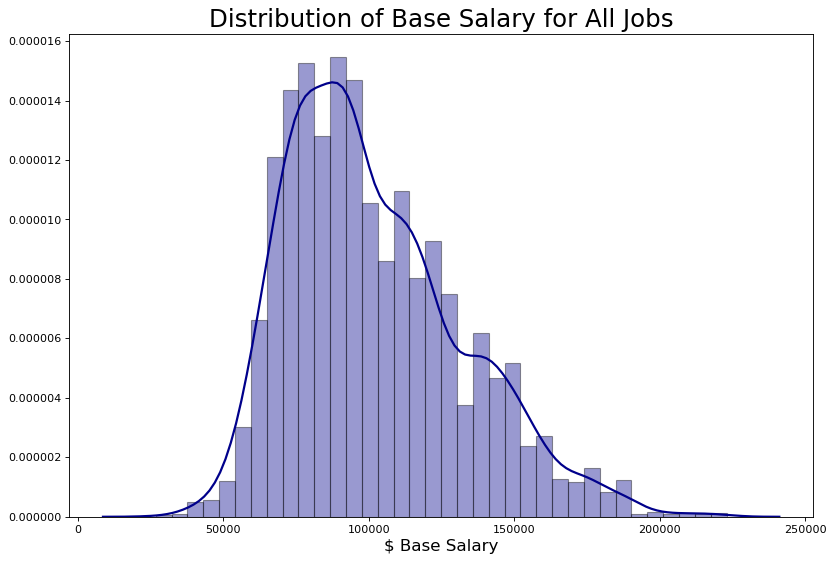

In [33]:
# Distribution of Base Salary for all Data Related Jobs
plt.figure(figsize=(12,8), dpi= 80)
sns.distplot(df.BaseSalary, hist=True, kde=True, bins=int(180/5), 
             color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
plt.title('Distribution of Base Salary for All Jobs', fontsize = 22)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('$ Base Salary', fontsize = 15)

#### 2.1.2 Top 10 Highest Paying Employers

In [34]:
df_emp_top_pay_stats = df.groupby('Employer')['BaseSalary'].agg(['mean','median','max','min'])
df_emp_top_pay_stats = df_emp_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
df_emp_top_pay_stats.index = np.arange(1,len(df_emp_top_pay_stats)+1)
df_emp_top_pay_stats

Employer      mean    median     max     min
1          D1 CAPITAL PARTNERS LP  200000.0  200000.0  200000  200000
2            CITADEL AMERICAS LLC  190000.0  190000.0  190000  190000
3   SHELL GLOBAL SOLUTIONS US INC  187300.0  187300.0  187300  187300
4              ROBLOX CORPORATION  186812.5  186812.5  215000  158625
5          BRAIN TECHNOLOGIES INC  185000.0  185000.0  185000  185000
6                     STUBHUB INC  184500.0  184500.0  184500  184500
7                    WHATSAPP INC  175189.5  175189.5  177899  172480
8    ALIGNMENT HEALTHCARE USA LLC  175000.0  175000.0  175000  175000
9         LENDINGHOME CORPORATION  175000.0  175000.0  175000  175000
10          THE RONIN PROJECT INC  174138.0  174138.0  174138  174138

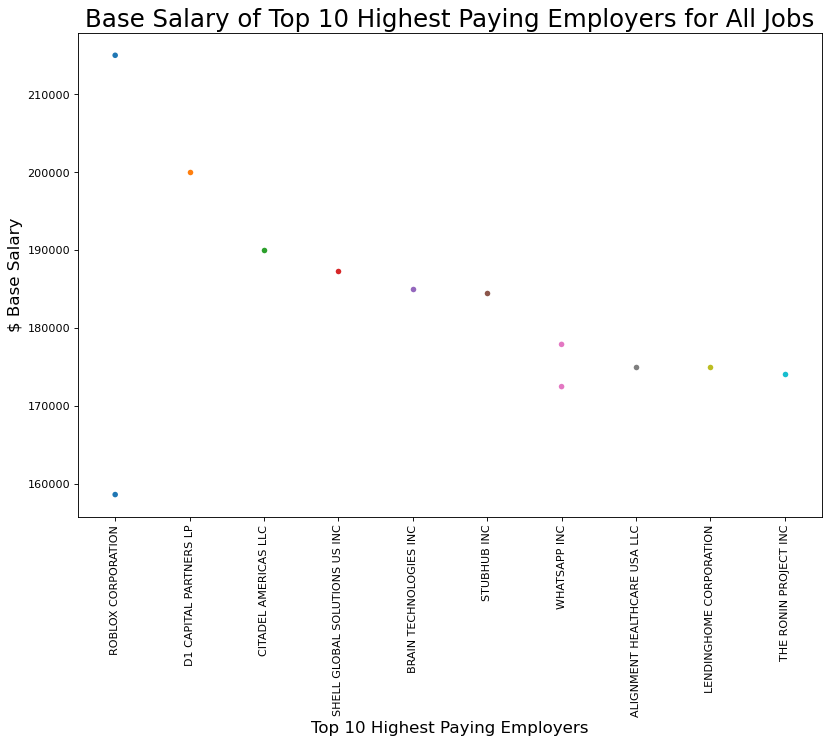

In [35]:
df_emp_top_pay_filter = df_emp_top_pay_stats.iloc[:,0]
df_emp_top_pay=df[df.Employer.isin(df_emp_top_pay_filter)].sort_values(by='BaseSalary',ascending=False).reset_index()


plt.figure(figsize=(12,8), dpi= 80)
sns.swarmplot(x='Employer', y='BaseSalary', data = df_emp_top_pay)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Base Salary of Top 10 Highest Paying Employers for All Jobs", fontsize=22)
plt.ylabel('$ Base Salary', fontsize = 15)
plt.xlabel('Top 10 Highest Paying Employers', fontsize = 15)
plt.show()

It looks like that there is not that many opportunities from the top hiring companies.

#### 2.1.3 Number of Hiring by Top 10 Highest Paying Employers

In [36]:
print('Number of Hiring by Top 10 Highest Paying Employers are:',len(df_emp_top_pay),'positions')

df_emp_top_pay_count = df.groupby('Employer')['BaseSalary'].agg(['count','mean'])
df_emp_top_pay_count = (df_emp_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
df_emp_top_pay_count = df_emp_top_pay_count.iloc[:,0:2].rename(columns={'Employer':'Top 10 Highest Paying Employers','count': 'Number of Position', 'mean':'Average Base Salary'})
df_emp_top_pay_count.index = np.arange(1, len(df_emp_top_pay_count)+1)
df_emp_top_pay_count

Number of Hiring by Top 10 Highest Paying Employers are: 12 positions


Top 10 Highest Paying Employers  Number of Position
1               ROBLOX CORPORATION                   2
2                     WHATSAPP INC                   2
3           D1 CAPITAL PARTNERS LP                   1
4             CITADEL AMERICAS LLC                   1
5    SHELL GLOBAL SOLUTIONS US INC                   1
6           BRAIN TECHNOLOGIES INC                   1
7                      STUBHUB INC                   1
8     ALIGNMENT HEALTHCARE USA LLC                   1
9          LENDINGHOME CORPORATION                   1
10           THE RONIN PROJECT INC                   1

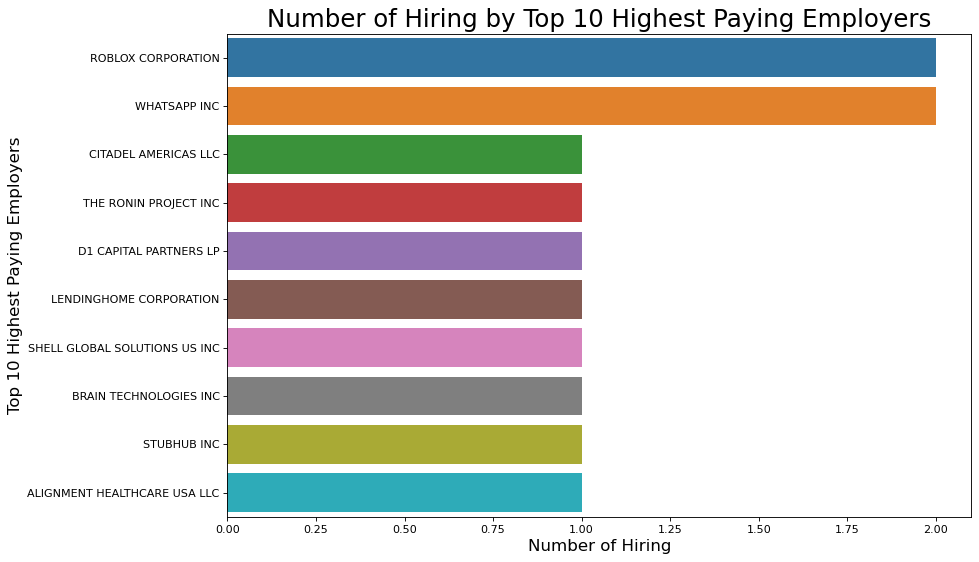

In [37]:
count_order1 = df_emp_top_pay['Employer'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(12,8), dpi= 80)
sns.countplot(y='Employer', data = df_emp_top_pay, order=count_order1)
plt.title('Number of Hiring by Top 10 Highest Paying Employers', fontsize=22)
plt.xlabel('Number of Hiring', fontsize = 15)
plt.ylabel('Top 10 Highest Paying Employers', fontsize = 15)
plt.show()

#### 2.1.4 Top 10 Highest Paying States

In [38]:
df_state_top_pay_stats = df.groupby('State')['BaseSalary'].agg(['count','mean','median','max','min'])
df_state_top_pay_stats = df_state_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
df_state_top_pay_stats.index = np.arange(1, len(df_state_top_pay_stats)+1)
df_state_top_pay_stats

State  count           mean    median     max    min
1       WASHINGTON    298  121633.989933  121200.0  182160  55744
2       CALIFORNIA   1297  119834.492675  118581.0  220000  36587
3            IDAHO      4  118609.500000  105375.0  168688  95000
4         NEW YORK    426  101787.389671   95000.0  223000  42000
5    MASSACHUSETTS    199  100960.080402   95000.0  220200  54163
6         MISSOURI     45   95630.911111   92235.0  150000  62000
7         OKLAHOMA     10   95141.300000   97300.0  117350  71302
8   NORTH CAROLINA     77   92727.246753   91582.0  149034  49192
9         COLORADO     34   92017.294118   91102.5  150000  54803
10    RHODE ISLAND     15   91850.800000   92040.0  130450  66000

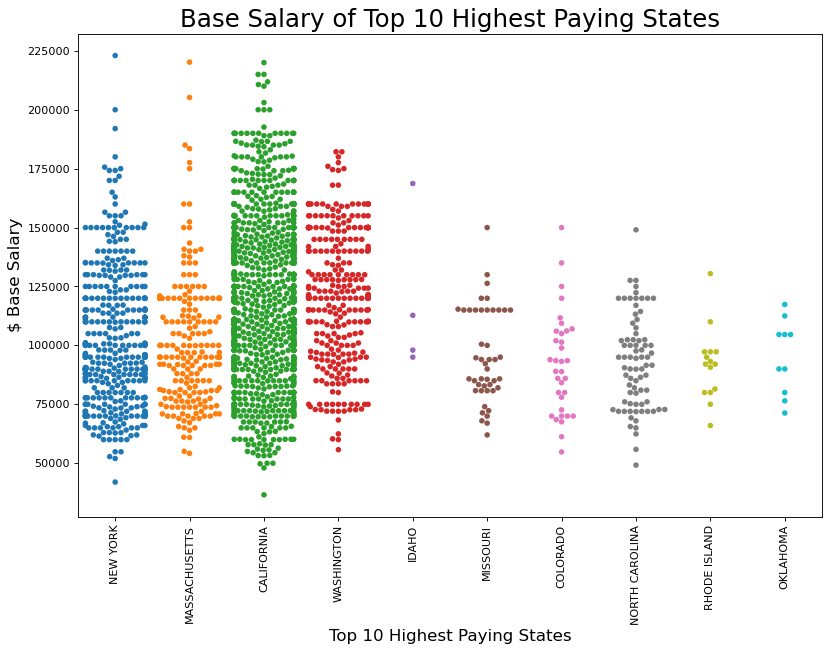

In [39]:
df_state_top_pay_filter = df_state_top_pay_stats.iloc[:,0]
df_state_top_pay=df[df.State.isin(df_state_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

plt.figure(figsize=(12,8), dpi= 80)
sns.swarmplot(x='State', y='BaseSalary', dodge = True, data = df_state_top_pay)
plt.title("Base Salary of Top 10 Highest Paying States", fontsize=22)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$ Base Salary', fontsize = 15)
plt.xlabel('Top 10 Highest Paying States', fontsize = 15)
plt.show()

#### 2.1.5  Number of Hiring by Top 10 Highest Paying States

In [40]:
print('Number of Position offered by Top 10 Highest Paying Employers are:',len(df_state_top_pay),'positions')

df_state_top_pay_count = df.groupby('State')['BaseSalary'].agg(['count','mean'])
df_state_top_pay_count = (df_state_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
df_state_top_pay_count = df_state_top_pay_count.iloc[:,0:2].rename(columns={'State':'Top 10 Highest Paying States','count': 'Number of Position', 'mean':'Average Base Salary'})
df_state_top_pay_count.index = np.arange(1, len(df_state_top_pay_count)+1)
df_state_top_pay_count

Number of Position offered by Top 10 Highest Paying Employers are: 2405 positions


Top 10 Highest Paying States  Number of Position
1                    CALIFORNIA                1297
2                      NEW YORK                 426
3                    WASHINGTON                 298
4                 MASSACHUSETTS                 199
5                NORTH CAROLINA                  77
6                      MISSOURI                  45
7                      COLORADO                  34
8                  RHODE ISLAND                  15
9                      OKLAHOMA                  10
10                        IDAHO                   4

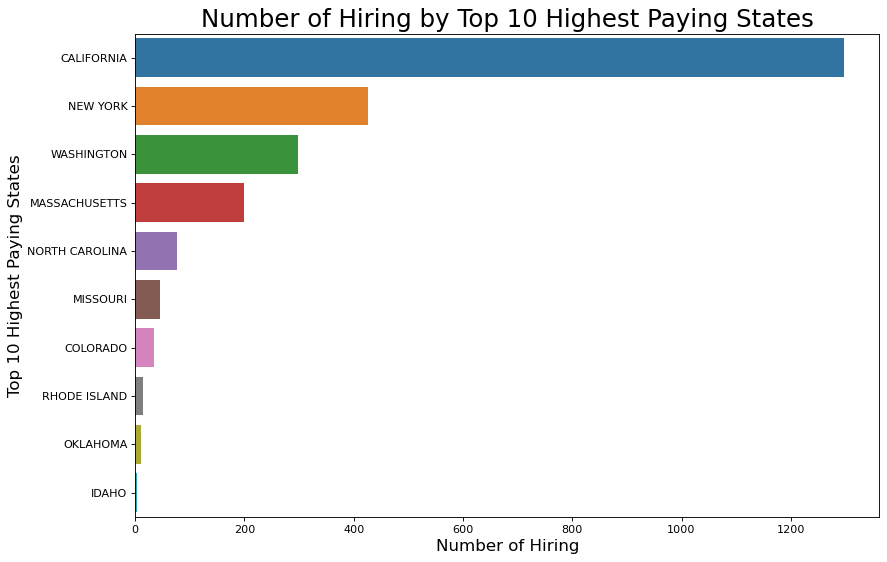

In [41]:
count_order1 = df_state_top_pay['State'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(12,8), dpi= 80)
sns.countplot(y='State', data = df_state_top_pay, order=count_order1)
plt.title('Number of Hiring by Top 10 Highest Paying States', fontsize=22)
plt.xlabel('Number of Hiring', fontsize = 15)
plt.ylabel('Top 10 Highest Paying States', fontsize = 15)
plt.show()

#### 2.1.6 Top 10 Highest Paying Cities

In [42]:
df_city_top_pay_stats = df.groupby('City')['BaseSalary'].agg(['count','mean','median','max','min'])
df_city_top_pay_stats = df_city_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
df_city_top_pay_stats.index = np.arange(1, len(df_city_top_pay_stats)+1)
df_city_top_pay_stats

City  count           mean    median     max     min
1           MALDEN      1  185000.000000  185000.0  185000  185000
2        SUITE 250      1  185000.000000  185000.0  185000  185000
3           ORANGE      1  175000.000000  175000.0  175000  175000
4       CALIFORNIA      1  166598.000000  166598.0  166598  166598
5           NOVATO      1  160000.000000  160000.0  160000  160000
6        CUPERTINO     38  154899.394737  157705.5  215000   53165
7   EAST PALO ALTO      4  154250.000000  151000.0  175000  140000
8       MENLO PARK     82  151539.463415  154722.0  220000   70880
9       GREAT NECK      1  150000.000000  150000.0  150000  150000
10         ALLSTON      1  150000.000000  150000.0  150000  150000

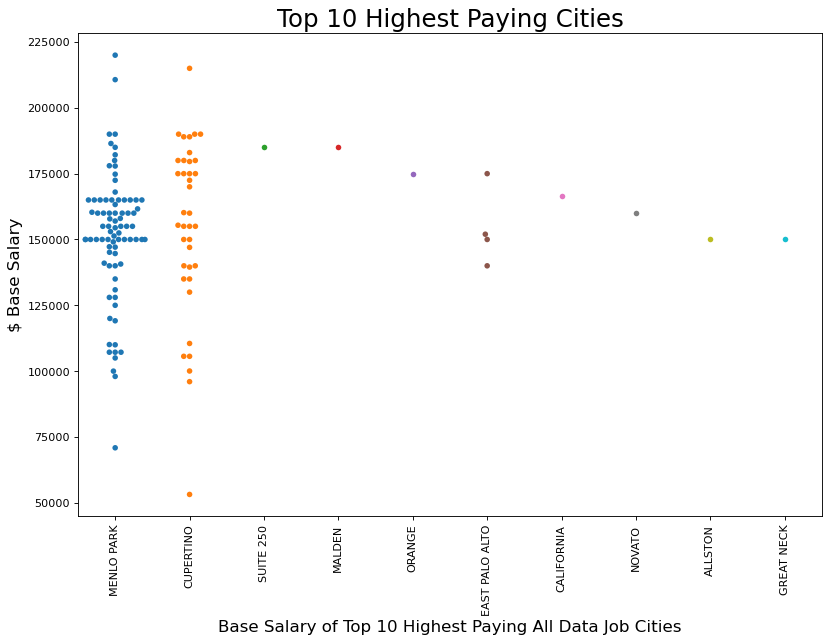

In [43]:
df_city_top_pay_filter = df_city_top_pay_stats.iloc[:,0]
df_city_top_pay=df[df.City.isin(df_city_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

plt.figure(figsize=(12,8), dpi= 80)
sns.swarmplot(x='City', y='BaseSalary', dodge = True, data = df_city_top_pay)
plt.title("Top 10 Highest Paying Cities", fontsize=22)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('$ Base Salary', fontsize = 15)
plt.xlabel('Base Salary of Top 10 Highest Paying All Data Job Cities', fontsize = 15)
plt.show()

#### 2.1.7 Number of Hiring by Top 10 Highest Paying Cities

In [44]:
print('Number of Positions offered by Top 10 Highest Paying Cities are:',len(df_city_top_pay),'positions')

df_city_top_pay_count = df.groupby('City')['BaseSalary'].agg(['count','mean'])
df_city_top_pay_count = (df_city_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
df_city_top_pay_count = df_city_top_pay_count.iloc[:,0:2].rename(columns={'City':'Top 10 Highest Paying Cities','count': 'Number of Positions', 'mean':'Average Base Salary'})
df_city_top_pay_count.index = np.arange(1, len(df_city_top_pay_count)+1)
df_city_top_pay_count

Number of Positions offered by Top 10 Highest Paying Cities are: 131 positions


Top 10 Highest Paying Cities  Number of Positions
1                    MENLO PARK                   82
2                     CUPERTINO                   38
3                EAST PALO ALTO                    4
4                        MALDEN                    1
5                     SUITE 250                    1
6                        ORANGE                    1
7                    CALIFORNIA                    1
8                        NOVATO                    1
9                    GREAT NECK                    1
10                      ALLSTON                    1

To take a look the where are those city at.

In [103]:
city1 = df[df['City']=='MALDEN']
city2 = df[df['City']=='SUITE 250']
city3 = df[df['City']=='ORANGE']
city4 = df[df['City']=='CALIFORNIA']
city5 = df[df['City']=='NOVATO']
city6 = df[df['City']=='CUPERTINO']
city7 = df[df['City']=='EAST PALO ALTO']
city8 = df[df['City']=='MENLO PARK']
city9 = df[df['City']=='GREAT NECK']
city10 = df[df['City']=='ALLSTON']
city_state = pd.concat([city1, city2, city3, city4, city5, city6, city7, city8, city9, city10])
city_state['State'].unique()

array(['MASSACHUSETTS', 'CALIFORNIA', 'NEW YORK'], dtype=object)

Top 10 paying cities are from Massachusetss, California and New York.

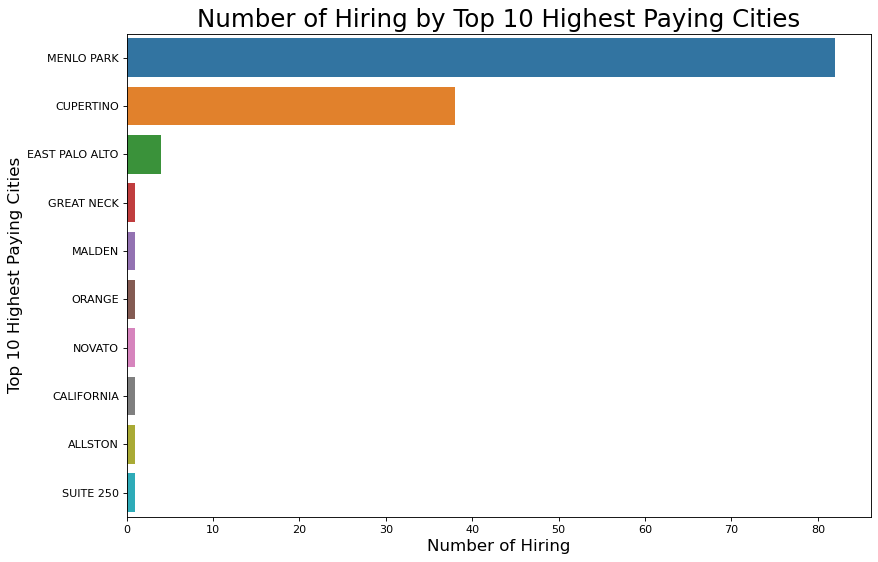

In [45]:
count_order1 = df_city_top_pay['City'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(12,8), dpi= 80)
sns.countplot(y='City', data = df_city_top_pay, order=count_order1)
plt.title('Number of Hiring by Top 10 Highest Paying Cities', fontsize=22)
plt.xlabel('Number of Hiring', fontsize = 15)
plt.ylabel('Top 10 Highest Paying Cities', fontsize = 15)
plt.show()

#### 2.1.8 Average Salary by Case Status

In [46]:
df_case_pay_status = df.groupby('CaseStatus')['BaseSalary'].agg(['count','mean','median','max','min'])
df_case_pay_status = df_case_pay_status.sort_values(by='mean',ascending=False).head(10).reset_index()
df_case_pay_status.index = np.arange(1, len(df_case_pay_status)+1)
df_case_pay_status

CaseStatus  count           mean  median     max    min
1  WITHDRAWN    160  104118.943750  100000  200000  45980
2  CERTIFIED   3951  101760.055176   95000  223000  26700
3     DENIED     24   88170.291667   84500  125000  60000

In [47]:
df_case_pay_status.iloc[:,0]

1    WITHDRAWN
2    CERTIFIED
3       DENIED
Name: CaseStatus, dtype: object

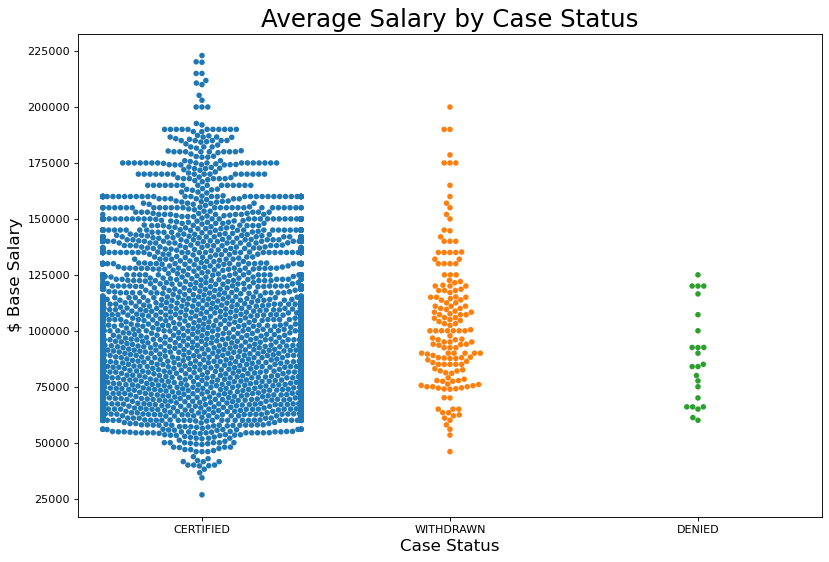

In [48]:
df_case_pay_filter = df_case_pay_status.iloc[:,0]
df_case_pay=df[df.CaseStatus.isin(df_case_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()


plt.figure(figsize=(12,8), dpi= 80)
sns.swarmplot(x='CaseStatus', y='BaseSalary', dodge = True, order=['CERTIFIED','WITHDRAWN','DENIED'], data = df_case_pay)
plt.title("Average Salary by Case Status", fontsize=22)
plt.yticks(fontsize=10)
plt.ylabel('$ Base Salary', fontsize = 15)
plt.xlabel('Case Status', fontsize = 15)
plt.show()

#### 2.1.9 Average Salary of Top 10 Highest Paying Employers by Case Status

In [49]:
df_emp_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2)

mean     max     min
CaseStatus                           
CERTIFIED   182911.83  215000  158625

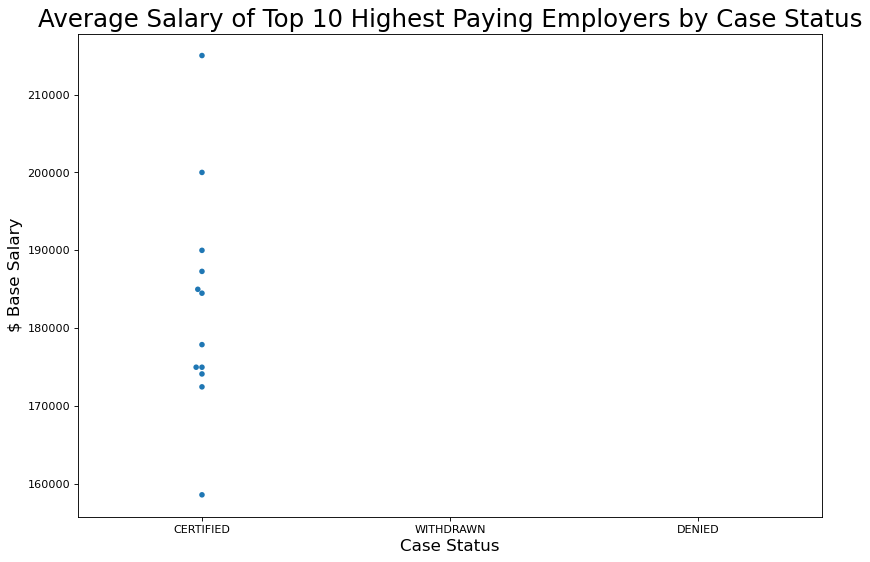

In [50]:
plt.figure(figsize=(12,8), dpi= 80)
sns.swarmplot(x='CaseStatus', y='BaseSalary', dodge = True, order=['CERTIFIED','WITHDRAWN','DENIED'], data = df_emp_top_pay)
plt.title("Average Salary of Top 10 Highest Paying Employers by Case Status", fontsize=22)
plt.yticks(fontsize=10)
plt.ylabel('$ Base Salary', fontsize = 15)
plt.xlabel('Case Status', fontsize = 15)
plt.show()

#### 2.1.10 Average Salary of Top 10 Highest Paying State by Case Status

In [51]:
df_state_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2)

mean     max    min
CaseStatus                          
CERTIFIED   113429.44  223000  36587
DENIED       94525.17  125000  65000
WITHDRAWN   112750.49  200000  60000

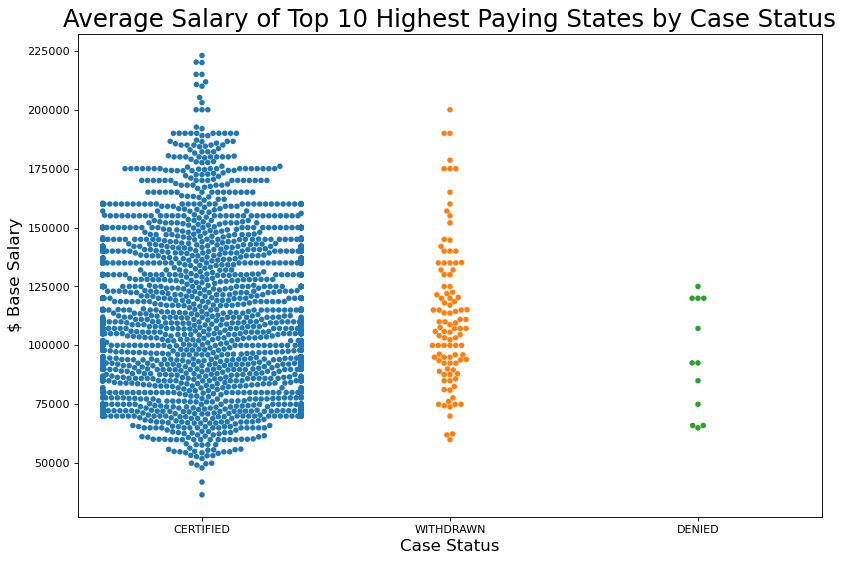

In [52]:
plt.figure(figsize=(12,8), dpi= 80)

sns.swarmplot(x='CaseStatus', y='BaseSalary', dodge = True, order=['CERTIFIED','WITHDRAWN','DENIED'], data = df_state_top_pay)
plt.title("Average Salary of Top 10 Highest Paying States by Case Status", fontsize=22)
plt.yticks(fontsize=10)
plt.ylabel('$ Base Salary', fontsize = 15)
plt.xlabel('Case Status', fontsize = 15)
plt.show()

#### 2.1.11 Average Salary of Top 10 Highest Paying Cities by Case Status

In [53]:
df_city_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Scientist and Data Analyst Jobs'})

Case Status for Data Scientist and Data Analyst Jobs       mean     max  \
0                                          CERTIFIED    153288.44  220000   
1                                          WITHDRAWN    157333.40  190000   

      min  
0   53165  
1  140000

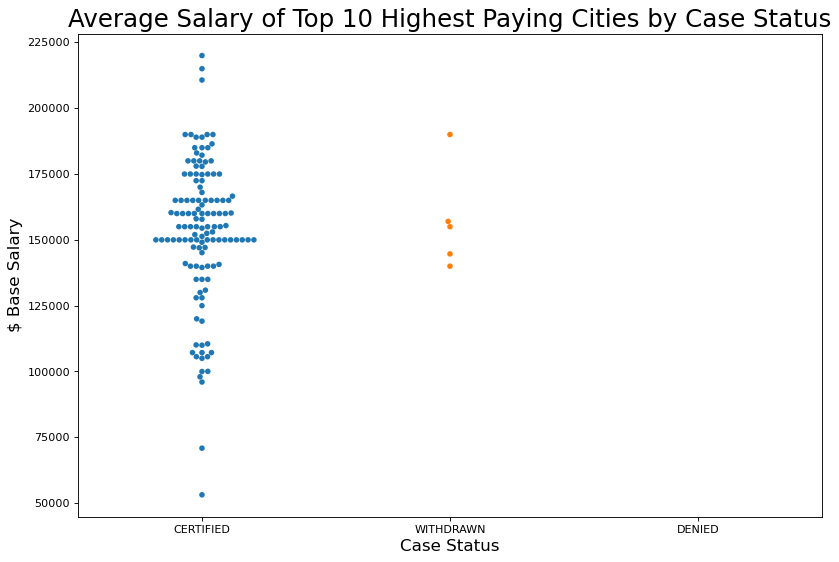

In [54]:
plt.figure(figsize=(12,8), dpi= 80)

sns.swarmplot(x='CaseStatus', y='BaseSalary', dodge = True, order=['CERTIFIED','WITHDRAWN','DENIED'], data = df_city_top_pay)
plt.title("Average Salary of Top 10 Highest Paying Cities by Case Status", fontsize=22)
plt.yticks(fontsize=10)
plt.ylabel('$ Base Salary', fontsize = 15)
plt.xlabel('Case Status', fontsize = 15)
plt.show()

### 2.2 Location Analysis
#### 2.2.1 Location of Top 10 Highest Hiring Employers

In [55]:
df_emp_top_hire_stats = df.groupby('Employer')['BaseSalary'].agg(['count'])
df_emp_top_hire_stats = df_emp_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
df_emp_top_hire_stats = df_emp_top_hire_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Hiring Employers for All Jobs'})
df_emp_top_hire_stats.index = np.arange(1, len(df_emp_top_hire_stats)+1)
df_emp_top_hire_stats

Top 10 Highest Hiring Employers for All Jobs  count
1                        AMAZONCOM SERVICES LLC    150
2                                  FACEBOOK INC    118
3                       WAL-MART ASSOCIATES INC    106
4                                    GOOGLE LLC     89
5                         CAPGEMINI AMERICA INC     81
6   INTERNATIONAL BUSINESS MACHINES CORPORATION     47
7                                    PAYPAL INC     42
8                                     APPLE INC     42
9                 INSURANCE SERVICES OFFICE INC     34
10                         LINKEDIN CORPORATION     32

In [56]:
#prepare data
df_emp_top_hire_filter = df_emp_top_hire_stats.iloc[:,0]
df_emp_top_hire=df[df.Employer.isin(df_emp_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

#-----
orange = sns.light_palette("orange", as_cmap=True)
temp1 = df_emp_top_hire[['Employer','State','City']].rename(columns={'Employer':'Top 10 Highest Hiring Employers for All Jobs'})
(pd.crosstab(index=temp1['State'], columns = [temp1['Top 10 Highest Hiring Employers for All Jobs']],margins=True, margins_name="Total")).sort_values(by='Total',ascending=False).style.background_gradient(cmap=orange)


#### 2.2.2 Location of Top 10 Highest Hiring States

In [57]:
df_state_top_hire_stats = df.groupby('State')['BaseSalary'].agg(['count'])
df_state_top_hire_stats = df_state_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
df_state_top_hire_stats = df_state_top_hire_stats.iloc[:,0:4].rename(columns={'State':'Top 10 Highest Hiring Employers for All Jobs'})
df_state_top_hire_stats.index = np.arange(1, len(df_state_top_hire_stats)+1)
df_state_top_hire_stats

Top 10 Highest Hiring Employers for All Jobs  count
1                                    CALIFORNIA   1297
2                                      NEW YORK    426
3                                         TEXAS    304
4                                    WASHINGTON    298
5                                 MASSACHUSETTS    199
6                                      ILLINOIS    180
7                                    NEW JERSEY    136
8                                  PENNSYLVANIA    131
9                                       GEORGIA    127
10                                     VIRGINIA    118

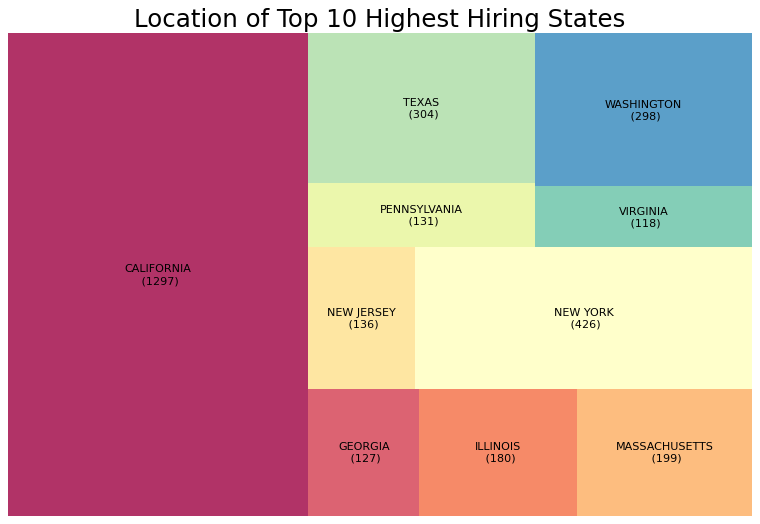

In [58]:
df_state_top_hire_filter = df_state_top_hire_stats.iloc[:,0]
df_state_top_hire=df[df.State.isin(df_state_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

temp_raw1 = df_state_top_hire
temp1 = temp_raw1.groupby('State').size().reset_index(name='counts')[:10]
labels1 = temp1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes1 = temp1['counts'].values.tolist()
colors1 = [plt.cm.Spectral(i/float(len(labels1))) for i in range(len(labels1))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes1, label=labels1, color=colors1, alpha=.8)

# Decorate
plt.title('Location of Top 10 Highest Hiring States', fontsize=22)
plt.axis('off')
plt.show()

#### 2.2.3 Location of Top 10 Highest Hiring Cities

In [59]:
df_city_top_hire_stats = df.groupby('City')['BaseSalary'].agg(['count'])
df_city_top_hire_stats = df_city_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
df_city_top_hire_stats = df_city_top_hire_stats.iloc[:,0:4].rename(columns={'City':'Top 10 Highest Hiring Cities for All Jobs'})
df_city_top_hire_stats.index = np.arange(1, len(df_city_top_hire_stats)+1)
df_city_top_hire_stats

Top 10 Highest Hiring Cities for All Jobs  count
1                                   NEW YORK    349
2                              SAN FRANCISCO    315
3                                    SEATTLE    206
4                                  SUNNYVALE    114
5                                    CHICAGO    114
6                              MOUNTAIN VIEW    110
7                                   SAN JOSE     96
8                                    ATLANTA     90
9                                     BOSTON     83
10                                MENLO PARK     82

In [104]:
city1 = df[df['City']=='NEW YORK']
city2 = df[df['City']=='SAN FRANCISCO 	']
city3 = df[df['City']=='SEATTLE']
city4 = df[df['City']=='SUNNYVALE']
city5 = df[df['City']=='CHICAGO']
city6 = df[df['City']=='MOUNTAIN VIEW']
city7 = df[df['City']=='SAN JOSE']
city8 = df[df['City']=='ATLANTA']
city9 = df[df['City']=='BOSTON']
city10 = df[df['City']=='MENLO PARK']
city_state = pd.concat([city1, city2, city3, city4, city5, city6, city7, city8, city9, city10])
city_state['State'].unique()

array(['NEW YORK', 'CONNECTICUT', 'WASHINGTON', 'CALIFORNIA', 'ILLINOIS',
       'GEORGIA', 'MASSACHUSETTS'], dtype=object)

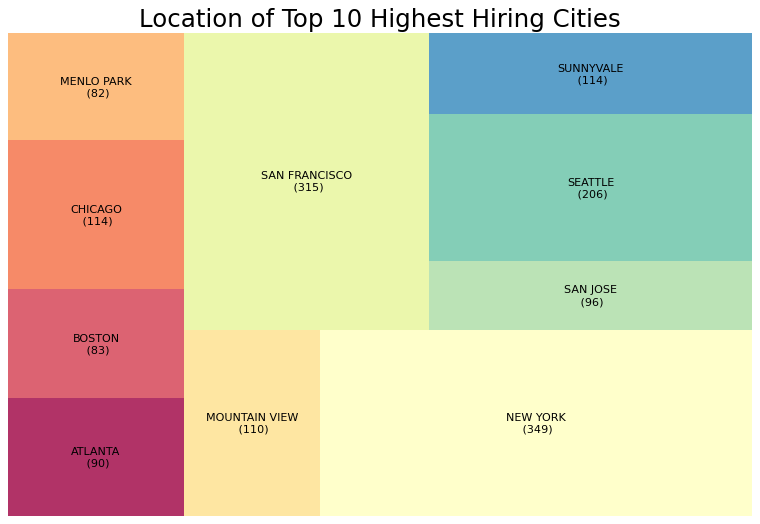

In [60]:
df_city_top_hire_filter = df_city_top_hire_stats.iloc[:,0]
df_city_top_hire=df[df.City.isin(df_city_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

temp_raw1 = df_city_top_hire
temp1 = temp_raw1.groupby('City').size().reset_index(name='counts')[:10]
labels1 = temp1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes1 = temp1['counts'].values.tolist()
colors1 = [plt.cm.Spectral(i/float(len(labels1))) for i in range(len(labels1))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes1, label=labels1, color=colors1, alpha=.8)

# Decorate
plt.title('Location of Top 10 Highest Hiring Cities', fontsize=22)
plt.axis('off')
plt.show()

### 2.3 Case Status Analysis
#### 2.3.1 Top 10 States by Case Status

In [61]:
temp_df=df.rename(columns={'State':'Top 10 States of Hiring'})

(pd.crosstab(index=temp_df['Top 10 States of Hiring'], columns = [temp_df['CaseStatus']])).sort_values(by=['CERTIFIED'],ascending=False)[:10]

CaseStatus               CERTIFIED  DENIED  WITHDRAWN
Top 10 States of Hiring                              
CALIFORNIA                    1233       6         58
NEW YORK                       395       5         26
WASHINGTON                     295       0          3
TEXAS                          293       4          7
MASSACHUSETTS                  191       1          7
ILLINOIS                       170       2          8
NEW JERSEY                     135       0          1
GEORGIA                        123       0          4
PENNSYLVANIA                   121       2          8
VIRGINIA                       111       0          7

#### 2.3.2 Case Status and Base Salary of Top 10 Hiring Employers

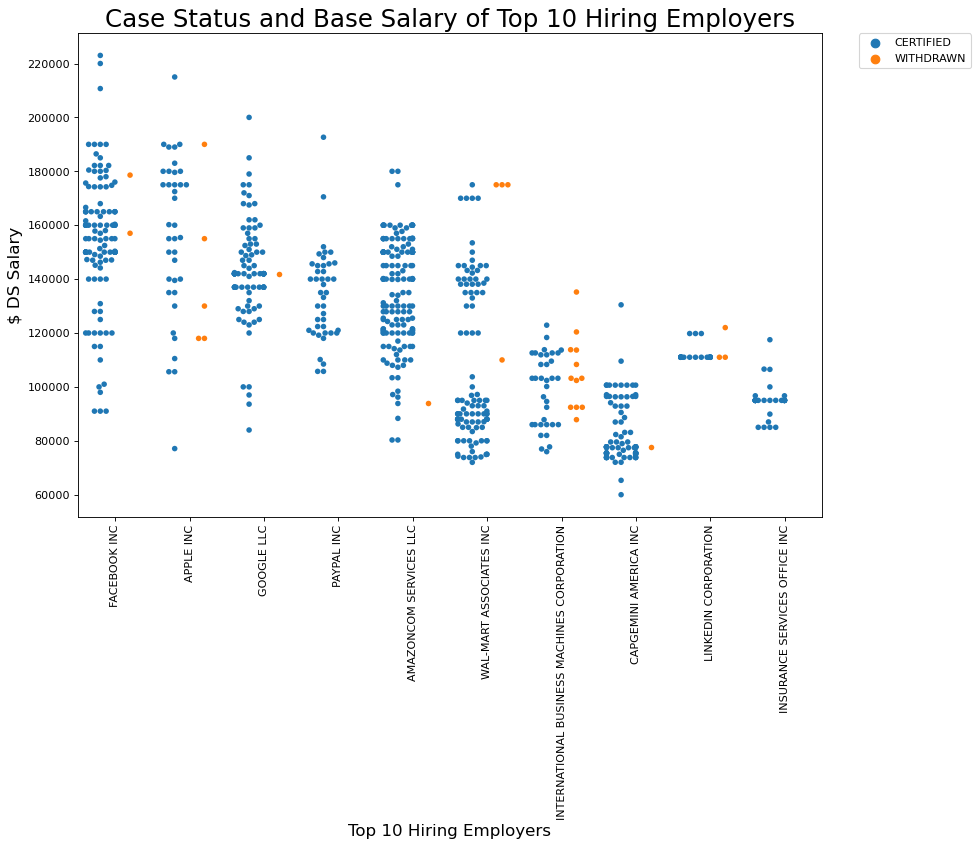

In [62]:
plt.figure(figsize=(12,8), dpi=80)

sns.swarmplot(x='Employer', y='BaseSalary', hue = 'CaseStatus', dodge = True, data = df_emp_top_hire)
plt.title("Case Status and Base Salary of Top 10 Hiring Employers", fontsize=22)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel('$ DS Salary', fontsize = 15)
plt.xlabel('Top 10 Hiring Employers', fontsize = 15)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.show()

There is no denial cases in the top 10 hiring employers.

#### 2.3.3 Case Status and Base Salary of Top 10 Hiring States

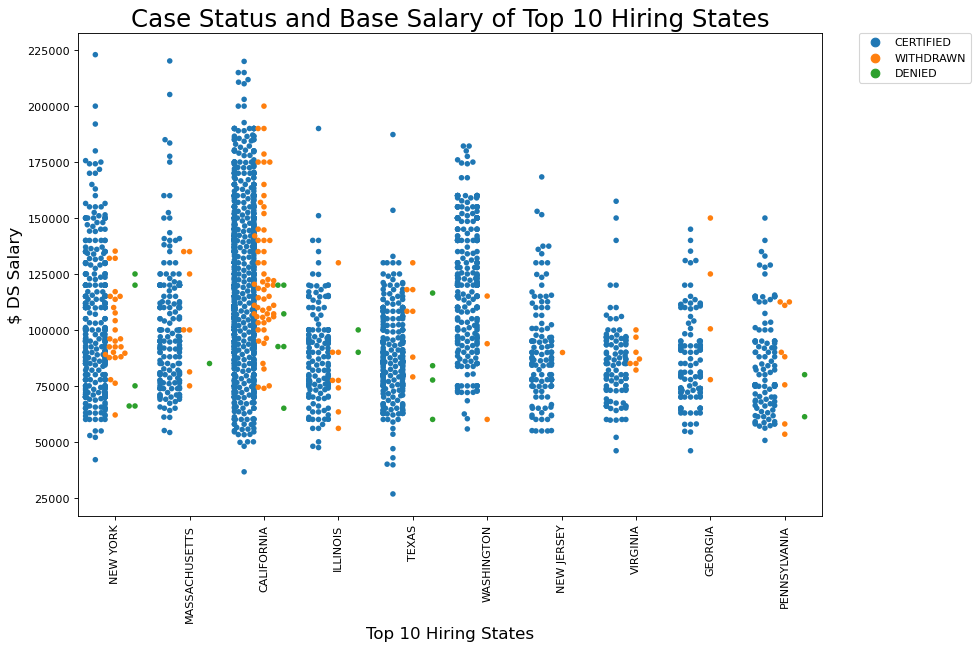

In [63]:
plt.figure(figsize=(12,8), dpi=80)

sns.swarmplot(x='State', y='BaseSalary', hue = 'CaseStatus', dodge = True, data = df_state_top_hire)
plt.title("Case Status and Base Salary of Top 10 Hiring States", fontsize=22)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel('$ DS Salary', fontsize = 15)
plt.xlabel('Top 10 Hiring States', fontsize = 15)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.show()

#### 2.3.4 Case Status and Base Salary of Top 10 Hiring Cities

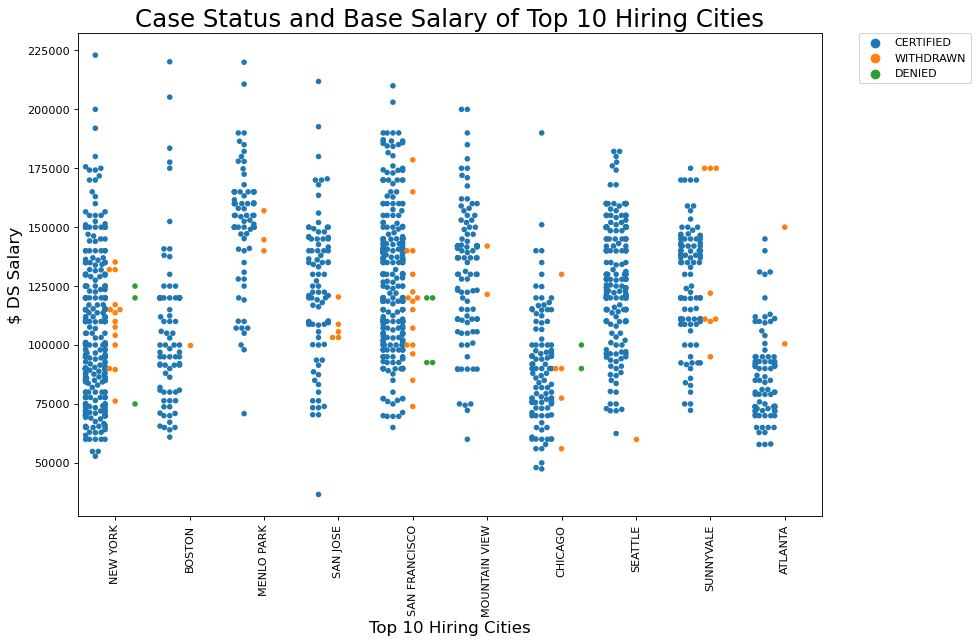

In [64]:
plt.figure(figsize=(12,8), dpi=80)

sns.swarmplot(x='City', y='BaseSalary', hue = 'CaseStatus', dodge = True, data = df_city_top_hire)
plt.title("Case Status and Base Salary of Top 10 Hiring Cities", fontsize=22)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel('$ DS Salary', fontsize = 15)
plt.xlabel('Top 10 Hiring Cities', fontsize = 15)
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.show()

-------
-------
-------
-------
-------
-------
-------
-------

## 3. Overview Analysis of All Scientist and Data Analyst Data
In this section, we will conduct and compare the analysis on the dataset of data scientist and the dataset of data analyst individually. 

### Summary
1.Salary Analysis
- The top 10 highest paying employers of data scientists and the top 10 highest paying employers of data analysts are not overlapped.
- The top 10 highest paying employers' mean base salary for the data scientist is from $\$$ 175,000 to $\$$200,000. The top 10 highest paying employers' mean base salary for the data analyst is from $\$$ 135,000 to $\$$170,000. 
- The top 10 highest paying employers for both data scientists and data analysts only hire 1-2 positions.
California, Washington, and New York states are three states in the top 10 highest paying states for data scientists and the top 10 highest paying states for data analysts.
- The top 10 highest paying state' mean base salary for the data scientist is from $\$$ 98,901 to $\$$128,878. The top 10 highest paying state's mean base salary for the data analyst is $\$$ 81,837 to $\$$94,482. 
- The number of hiring for the top 10 highest paying states for data scientists ranges from 4 to 956, and the number of hiring for the top 10 highest paying states for data analyst ranges from 3 to 341.
- The top 10 highest paying cities mean base salary for the data scientist is from $\$$ 153,000 to $\$$185,000. The top 10 highest paying cities' mean base salary for the data analyst is $\$$ 113,250 to $\$$145,000. 
- The number of hiring for the top 10 highest paying cities for data scientists ranges from 1 to 76, and the number of hiring for the top 10 highest paying cities for data analyst ranges from 1 to 6.
- There is no denial cases for data scientists of the top 10 highest paying cities, nor the top 10 highest paying cities of data analyst of cities.              

2.Location Analysis
- Amazon, Facebook, and Paypal are in the top 10 hiring employers for data scientists and the top 10 hiring employers for data analysts. 
- The most hiring location of 7 employers of the top 10 hiring employers for Data Scientist has the most hiring position in California, Washington, and New York State. 
- The most hiring location of 7 employers of the top 10 hiring employers for data analyst is California, Arkansas and Georgia. 
- California, New York, Washington, Texas, Massachusetts, Illinois, Pennsylvania, New Jersey, Georgia are 9 states of the top 10 hiring states for data scientists and the top 10 hiring states for data analysts.
- New York, San Francisco, Seattle, Chicago, San Jose, and Atlanta are 5 cities of the top 10 hiring cities for data scientists and the top 10 hiring cities for data analysts.      

3.Case Status Analysis
- The more certified cases are, the more number of denied cases and the number of withdrawn cases.
- There is only 1 denied cases in the top 10 hiring cities of hiring data analyst. 

### 3.1 Salary Distriubtion
#### 3.1.1 Salary Distribution

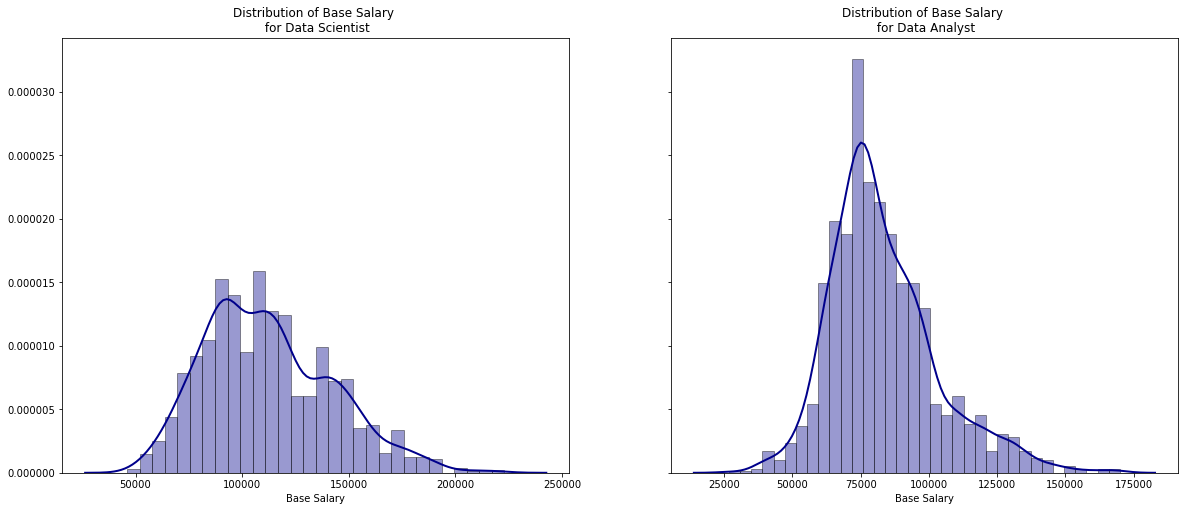

In [107]:
# Distribution of Base Salary for Data Scientist and Data Analyst Jobs
#define 1x2 plot on the same canvas
fig, ax = plt.subplots(1,2, figsize = (20,8), sharey=True)

#plot distriubtion
sns.distplot(ds.BaseSalary.values, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2}, ax = ax[0])
sns.distplot(da.BaseSalary.values, color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2}, ax = ax[1])

#add title
ax[0].set_title('Distribution of Base Salary \n for Data Scientist')
ax[1].set_title('Distribution of Base Salary \n for Data Analyst')

#disable scientific notation
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].ticklabel_format(style='plain', axis='y')

#add x label
ax[0].set_xlabel('Base Salary')
ax[1].set_xlabel('Base Salary')

plt.show()

#### 3.1.2 Top 10 Highest Paying Employers

In [66]:
# display dataframe side by side for easy comparison
def multi_table(table_list):
    '''
    accepts a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
    '<table><tr style="background-color:white;">' +
    ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
    '</tr></table>'
    )

In [67]:
#df_emp_top_pay_stats = df.groupby('Employer')['BaseSalary'].agg(['mean','median','max','min','std'])
#df_emp_top_pay_stats = df_emp_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
#temp1 = df_emp_top_pay_stats['Employer']


ds_emp_top_pay_stats = ds.groupby('Employer')['BaseSalary'].agg(['mean','median','max','min','std'])
ds_emp_top_pay_stats = ds_emp_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
temp2 = ds_emp_top_pay_stats['Employer']

da_emp_top_pay_stats = da.groupby('Employer')['BaseSalary'].agg(['mean','median','max','min','std'])
da_emp_top_pay_stats = da_emp_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
temp3 = da_emp_top_pay_stats['Employer']

temp = pd.DataFrame(list(zip(temp2.to_list(),temp3.to_list())), 
                      columns=['Top 10 Highest Paying Employers for Data Scientist Jobs',
                               'Top 10 Highest Paying Employers for Data Analyst Jobs'])
temp.index = np.arange(1, len(temp)+1)
temp

Top 10 Highest Paying Employers for Data Scientist Jobs  \
1                              D1 CAPITAL PARTNERS LP        
2                                   IRIS SOFTWARE INC        
3                                CITADEL AMERICAS LLC        
4                       SHELL GLOBAL SOLUTIONS US INC        
5                                  ROBLOX CORPORATION        
6                              BRAIN TECHNOLOGIES INC        
7                                         STUBHUB INC        
8                                        WHATSAPP INC        
9                        ALIGNMENT HEALTHCARE USA LLC        
10                            LENDINGHOME CORPORATION        

   Top 10 Highest Paying Employers for Data Analyst Jobs  
1                                      DEMANDBASE INC     
2                                 AGA SERVICE COMPANY     
3                            VITECH SYSTEMS GROUP INC     
4                               DESIGN LABORATORY INC     
5                                          SLALOM LLC     
6                  WILTON AGRICULTURAL STRATEGIES LLC     
7                                          LAMBDA INC     
8                        BALYASNY ASSET MANAGEMENT LP     
9                               CREOAL CONSULTING LLC     
10                                           MOVE INC

#### 3.1.3 Average Salary of Top 10 Highest Paying Employers

In [68]:
# let's find top pay emp and their pay stats
#df_emp_top_pay_stats = df.groupby('Employer')['BaseSalary'].agg(['mean','max','min'])
#df_emp_top_pay_stats = df_emp_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
#df_emp_top_pay_stats = df_emp_top_pay_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Paying Employers for All Jobs'})
#df_emp_top_pay_stats.index = np.arange(1, len(df_emp_top_pay_stats)+1)

ds_emp_top_pay_stats = ds.groupby('Employer')['BaseSalary'].agg(['mean','max','min'])
ds_emp_top_pay_stats = ds_emp_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
ds_emp_top_pay_stats = ds_emp_top_pay_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Paying Employers for Data Scientist Jobs'})
ds_emp_top_pay_stats.index = np.arange(1, len(ds_emp_top_pay_stats)+1)

da_emp_top_pay_stats = da.groupby('Employer')['BaseSalary'].agg(['mean','max','min'])
da_emp_top_pay_stats = da_emp_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
da_emp_top_pay_stats = da_emp_top_pay_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Paying Employers for Data Analyst Jobs'})
da_emp_top_pay_stats.index = np.arange(1, len(da_emp_top_pay_stats)+1)

multi_table([ds_emp_top_pay_stats,da_emp_top_pay_stats])

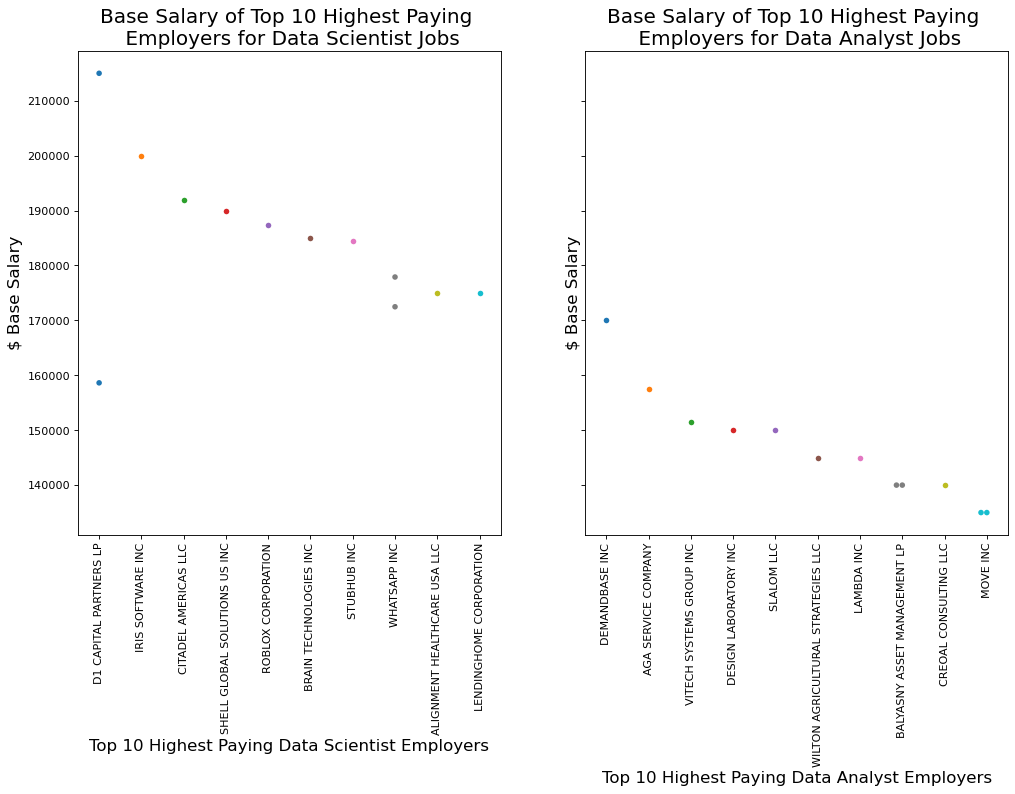

In [109]:
# Get top 10 highest paying employers
# for all data related jobs
#df_emp_top_pay_filter = df_emp_top_pay_stats.iloc[:,0]
#df_emp_top_pay=df[df.Employer.isin(df_emp_top_pay_filter)].sort_values(by='BaseSalary',ascending=False).reset_index()

# for all data scientist jobs
ds_emp_top_pay_filter = ds_emp_top_pay_stats.iloc[:,0]
ds_emp_top_pay=ds[ds.Employer.isin(ds_emp_top_pay_filter)].sort_values(by='BaseSalary',ascending=False).reset_index()

# for all data analyst jobs
da_emp_top_pay_filter = da_emp_top_pay_stats.iloc[:,0]
da_emp_top_pay=da[da.Employer.isin(da_emp_top_pay_filter)].sort_values(by='BaseSalary',ascending=False).reset_index()

#-----------------------

#plt.figure(figsize=(15,8), dpi= 80)
#sns.swarmplot(x='Employer', y='BaseSalary', data = df_emp_top_pay)

#plt.xticks(rotation=90, fontsize=10)
#plt.yticks(fontsize=10)
#plt.title("Base Salary of Top 10 Highest Paying Employers for All Jobs", fontsize=22)
#plt.ylabel('$ Base Salary', fontsize = 15)
#plt.xlabel('Top 10 Highest Paying Employer', fontsize = 15)
#plt.show()


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8), sharey=True, dpi= 80)

sns.swarmplot(x='Employer', y='BaseSalary', dodge = True, data = ds_emp_top_pay, ax=ax1)
sns.swarmplot(x='Employer', y='BaseSalary', dodge = True, data = da_emp_top_pay, ax=ax2)

ax1.set_title("Base Salary of Top 10 Highest Paying \n Employers for Data Scientist Jobs", fontsize=18)
ax2.set_title("Base Salary of Top 10 Highest Paying \n Employers for Data Analyst Jobs", fontsize=18)


ax1.set_xlabel('Top 10 Highest Paying Data Scientist Employers',fontsize = 15)
ax2.set_xlabel('Top 10 Highest Paying Data Analyst Employers',fontsize = 15)

ax1.set_ylabel('$ Base Salary',fontsize = 15)
ax2.set_ylabel('$ Base Salary',fontsize = 15)


ax1.set_xticklabels(ds_emp_top_pay_filter.to_list(), rotation=90)
ax2.set_xticklabels(da_emp_top_pay_filter.to_list(), rotation=90)
fig.subplots_adjust(hspace=5)
plt.show()

It seems that top 10 highest employers offer very few positions. Let's see how many positions do those top 10 highest pay employers offer.

#### 3.1.4 Number of Hiring by Top 10 Highest Paying Employers

In [70]:
#print('Number of Position offered by Top 10 Highest Paying Employers:',len(df_emp_top_pay),'positions')
print('Number of Position offered by Top 10 Highest Paying Employers of Data Scientist Jobs:',len(ds_emp_top_pay),'positions')
print('Number of Position offered by Top 10 Highest Paying Employers of Data Analyst Jobs:',len(da_emp_top_pay),'positions')

#df_emp_top_pay_count = df.groupby('Employer')['BaseSalary'].agg(['count','mean'])
#df_emp_top_pay_count = (df_emp_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
#df_emp_top_pay_count = df_emp_top_pay_count.iloc[:,0:2].rename(columns={'Employer':'Top 10 Highest Paying Employers','count': 'Number of Position', 'mean':'Average Base Salary'})
#df_emp_top_pay_count.index = np.arange(1, len(df_emp_top_pay_count)+1)

ds_emp_top_pay_count = ds.groupby('Employer')['BaseSalary'].agg(['count','mean'])
ds_emp_top_pay_count = (ds_emp_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
ds_emp_top_pay_count = ds_emp_top_pay_count.iloc[:,0:2].rename(columns={'Employer':'Top 10 Highest Paying Employers of Data Scientist Jobs','count': 'Number of Position', 'mean':'Average Base Salary'})
ds_emp_top_pay_count.index = np.arange(1, len(ds_emp_top_pay_count)+1)

da_emp_top_pay_count = da.groupby('Employer')['BaseSalary'].agg(['count','mean'])
da_emp_top_pay_count = (da_emp_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
da_emp_top_pay_count = da_emp_top_pay_count.iloc[:,0:2].rename(columns={'Employer':'Top 10 Highest Paying Employers of Data Analyst Jobs','count': 'Number of Position', 'mean':'Average Base Salary'})
da_emp_top_pay_count.index = np.arange(1, len(da_emp_top_pay_count)+1)

multi_table([ds_emp_top_pay_count,da_emp_top_pay_count])

Number of Position offered by Top 10 Highest Paying Employers of Data Scientist Jobs: 12 positions
Number of Position offered by Top 10 Highest Paying Employers of Data Analyst Jobs: 12 positions


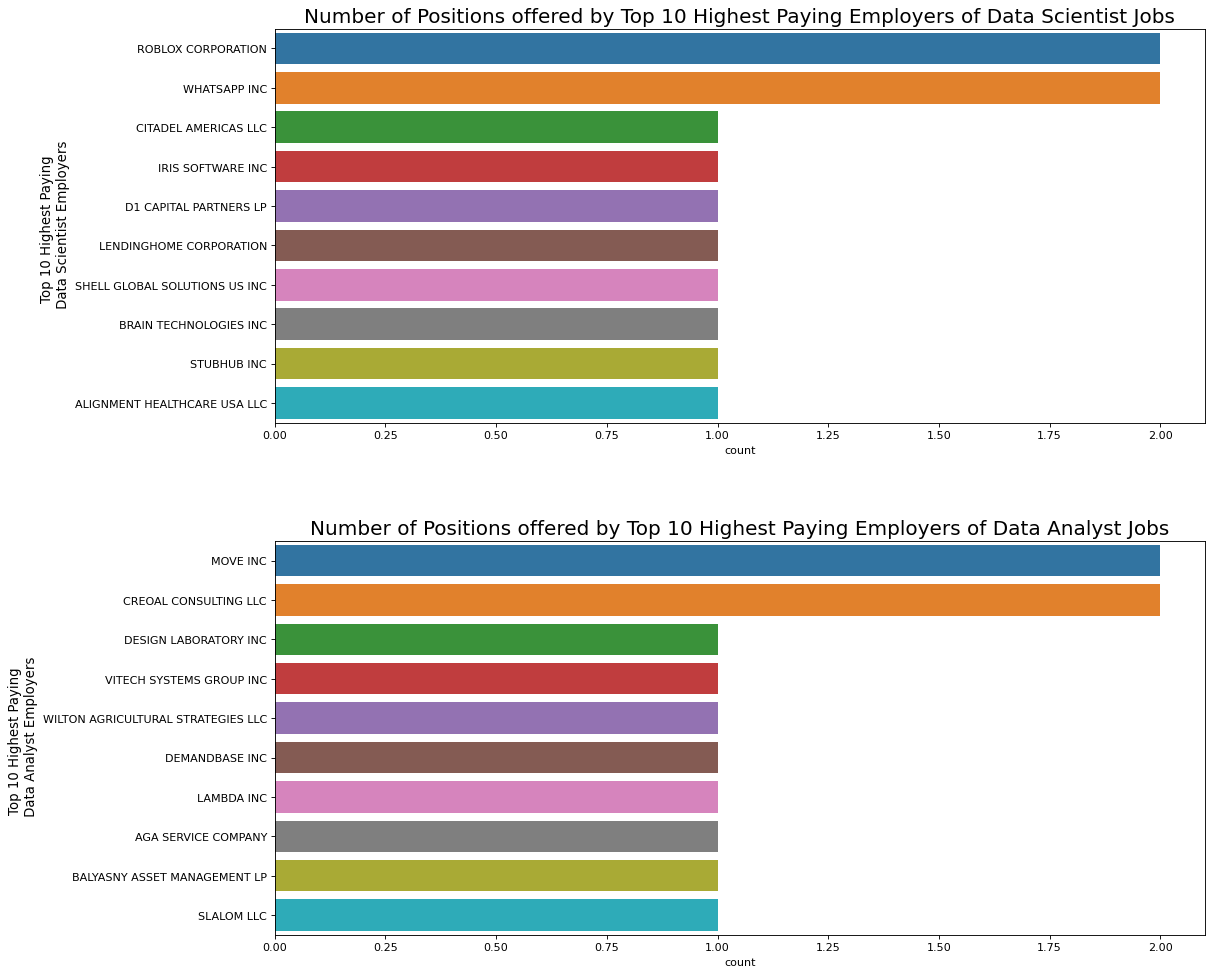

In [71]:
#count_order1 = df_emp_top_pay['Employer'].value_counts().sort_values(ascending=False).index
count_order1 = ds_emp_top_pay['Employer'].value_counts().sort_values(ascending=False).index
count_order2 = da_emp_top_pay['Employer'].value_counts().sort_values(ascending=False).index

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15), dpi= 80, sharex=False)
sns.countplot(y='Employer', data = ds_emp_top_pay, order=count_order1, ax=ax1)
sns.countplot(y='Employer', data = da_emp_top_pay, order=count_order2, ax=ax2)

ax1.set_title('Number of Positions offered by Top 10 Highest Paying Employers of Data Scientist Jobs', fontsize = 18)
ax2.set_title('Number of Positions offered by Top 10 Highest Paying Employers of Data Analyst Jobs', fontsize = 18)

ax1.set_ylabel('Top 10 Highest Paying \n Data Scientist Employers',fontsize = 12)
ax2.set_ylabel('Top 10 Highest Paying \n Data Analyst Employers',fontsize = 12)

fig.subplots_adjust(hspace=.3)
plt.show()

#### 3.1.5 Top 10 Highest Paying State

In [72]:
#df_state_top_pay_stats = df.groupby('State')['BaseSalary'].agg(['count','mean','median','max','min','std'])
#df_state_top_pay_stats = df_state_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
#temp1 = df_state_top_pay_stats['State']

ds_state_top_pay_stats = ds.groupby('State')['BaseSalary'].agg(['count','mean','median','max','min','std'])
ds_state_top_pay_stats = ds_state_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
temp2 = ds_state_top_pay_stats['State']

da_state_top_pay_stats = da.groupby('State')['BaseSalary'].agg(['count','mean','median','max','min','std'])
da_state_top_pay_stats = da_state_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
temp3 = da_state_top_pay_stats['State']

temp = pd.DataFrame(list(zip(temp2.to_list(),temp3.to_list())), 
                      columns=['Top 10 Highest Paying States for Data Scientist Jobs',
                               'Top 10 Highest Paying States for Data Analyst Jobs'])
temp.index = np.arange(1, len(temp)+1)
temp

Top 10 Highest Paying States for Data Scientist Jobs  \
1                                          CALIFORNIA     
2                                          WASHINGTON     
3                                               IDAHO     
4                                DISTRICT OF COLUMBIA     
5                                            NEW YORK     
6                                       MASSACHUSETTS     
7                                                UTAH     
8                                            COLORADO     
9                                            VIRGINIA     
10                                           MISSOURI     

   Top 10 Highest Paying States for Data Analyst Jobs  
1                                          CALIFORNIA  
2                                        RHODE ISLAND  
3                                          WASHINGTON  
4                                      NORTH CAROLINA  
5                                            MARYLAND  
6                                              OREGON  
7                                            DELAWARE  
8                                            NEW YORK  
9                                               TEXAS  
10                                         NEW JERSEY

#### 3.1.6 Average Salary of Top 10 Highest Paying States

In [73]:
# let's find top pay emp and their pay stats
#df_state_top_pay_stats = df.groupby('State')['BaseSalary'].agg(['mean','max','min']).round(2)
#df_state_top_pay_stats = df_state_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
#df_state_top_pay_stats = df_state_top_pay_stats.rename(columns={'State':'Top 10 Highest Paying States'})
#df_state_top_pay_stats.index = np.arange(1, len(df_state_top_pay_stats)+1)

ds_state_top_pay_stats = ds.groupby('State')['BaseSalary'].agg(['mean','max','min']).round(2)
ds_state_top_pay_stats = ds_state_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
ds_state_top_pay_stats = ds_state_top_pay_stats.rename(columns={'State':'Top 10 Highest Paying States for Data ScientistJobs'})
ds_state_top_pay_stats.index = np.arange(1, len(ds_state_top_pay_stats)+1)

da_state_top_pay_stats = da.groupby('State')['BaseSalary'].agg(['mean','max','min']).round(2)
da_state_top_pay_stats = da_state_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
da_state_top_pay_stats = da_state_top_pay_stats.rename(columns={'State':'Top 10 Highest Paying States for Data Analyst Jobs'})
da_state_top_pay_stats.index = np.arange(1, len(da_state_top_pay_stats)+1)

multi_table([ds_state_top_pay_stats,da_state_top_pay_stats])

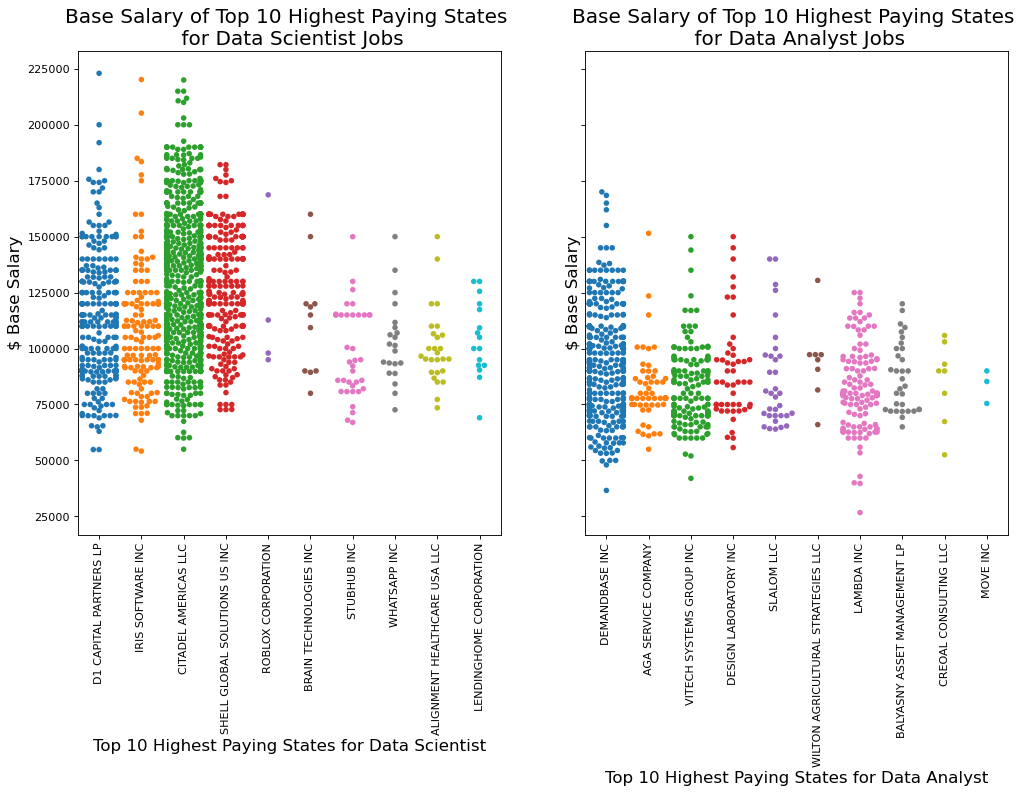

In [108]:
#prepare data
#df_state_top_pay_filter = df_state_top_pay_stats.iloc[:,0]
#df_state_top_pay=df[df.State.isin(df_state_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

ds_state_top_pay_filter = ds_state_top_pay_stats.iloc[:,0]
ds_state_top_pay=ds[ds.State.isin(ds_state_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

da_state_top_pay_filter = da_state_top_pay_stats.iloc[:,0]
da_state_top_pay=da[da.State.isin(da_state_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

#-----------------------
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8), sharey=True, dpi= 80)

sns.swarmplot(x='State', y='BaseSalary', dodge = True, data = ds_state_top_pay, ax=ax1)
sns.swarmplot(x='State', y='BaseSalary', dodge = True, data = da_state_top_pay, ax=ax2)

ax1.set_title("Base Salary of Top 10 Highest Paying States \n for Data Scientist Jobs", fontsize=18)
ax2.set_title("Base Salary of Top 10 Highest Paying States \n for Data Analyst Jobs", fontsize=18)

ax1.set_xlabel('Top 10 Highest Paying States for Data Scientist',fontsize = 15)
ax2.set_xlabel('Top 10 Highest Paying States for Data Analyst',fontsize = 15)

ax1.set_ylabel('$ Base Salary',fontsize = 15)
ax2.set_ylabel('$ Base Salary',fontsize = 15)


ax1.set_xticklabels(ds_emp_top_pay_filter.to_list(), rotation=90)
ax2.set_xticklabels(da_emp_top_pay_filter.to_list(), rotation=90)
fig.subplots_adjust(hspace=5)
plt.show()

In [75]:
#prepare data
#xdf_state_top_pay_filter = df_state_top_pay_stats.iloc[:,0]
#xdf_state_top_pay=df[df.State.isin(df_state_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

#ds_state_top_pay_filter = ds_state_top_pay_stats.iloc[:,0]
#ds_state_top_pay=ds[ds.State.isin(ds_state_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

#da_state_top_pay_filter = da_state_top_pay_stats.iloc[:,0]
#da_state_top_pay=da[da.State.isin(da_state_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()


#plot
#count_order1 = df_state_top_pay['State'].value_counts().sort_values(ascending=False).index
#count_order2 = ds_state_top_pay['State'].value_counts().sort_values(ascending=False).index
#count_order3 = da_state_top_pay['State'].value_counts().sort_values(ascending=False).index


#fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,15), dpi= 80)
#sns.boxplot(x='State', y='BaseSalary', data=df_state_top_pay, order=count_order1, notch=False, ax=ax1)
#sns.boxplot(x='State', y='BaseSalary', data=ds_state_top_pay, order=count_order2, notch=False, ax=ax2)
#sns.boxplot(x='State', y='BaseSalary', data=da_state_top_pay, order=count_order3, notch=False, ax=ax3)

#ax1.set_title('Base Salary of Top 10 Highest Paying State for Data Scientist and Data Analyst Jobs')
#ax2.set_title('Base Salary of Top 10 Highest Paying State for Data Scientist Jobs')
#ax3.set_title('Base Salary of Top 10 Highest Paying State for Data Analyst Jobs')

#fig.subplots_adjust(hspace=1)
#plt.show()


#### 3.1.7 Number of Hiring by Top 10 Highest Paying States

In [76]:
#print('Number of Position offered by Top 10 Highest Paying Employers are:',len(df_state_top_pay),'positions')
print('Number of Position offered by Top 10 Highest Paying Employers of Data Scientist Jobs:',len(ds_state_top_pay),'positions')
print('Number of Position offered by Top 10 Highest Paying Employers of Data Analyst Jobs:',len(da_state_top_pay),'positions')

#df_state_top_pay_count = df.groupby('State')['BaseSalary'].agg(['count','mean'])
#df_state_top_pay_count = (df_state_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
#df_state_top_pay_count = df_state_top_pay_count.iloc[:,0:2].rename(columns={'State':'Top 10 Highest Paying States','count': 'Number of Position', 'mean':'Average Base Salary'})
#df_state_top_pay_count.index = np.arange(1, len(df_state_top_pay_count)+1)

ds_state_top_pay_count = ds.groupby('State')['BaseSalary'].agg(['count','mean'])
ds_state_top_pay_count = (ds_state_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
ds_state_top_pay_count = ds_state_top_pay_count.iloc[:,0:2].rename(columns={'State':'Top 10 Highest Paying States for Data Scientist Jobs','count': 'Number of Position', 'mean':'Average Base Salary'})
ds_state_top_pay_count.index = np.arange(1, len(ds_state_top_pay_count)+1)

da_state_top_pay_count = da.groupby('State')['BaseSalary'].agg(['count','mean'])
da_state_top_pay_count = (da_state_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
da_state_top_pay_count = da_state_top_pay_count.iloc[:,0:2].rename(columns={'State':'Top 10 Highest Paying States for Data Analyst Jobs','count': 'Number of Position', 'mean':'Average Base Salary'})
da_state_top_pay_count.index = np.arange(1, len(da_state_top_pay_count)+1)

multi_table([ds_state_top_pay_count,da_state_top_pay_count])

Number of Position offered by Top 10 Highest Paying Employers of Data Scientist Jobs: 1738 positions
Number of Position offered by Top 10 Highest Paying Employers of Data Analyst Jobs: 821 positions


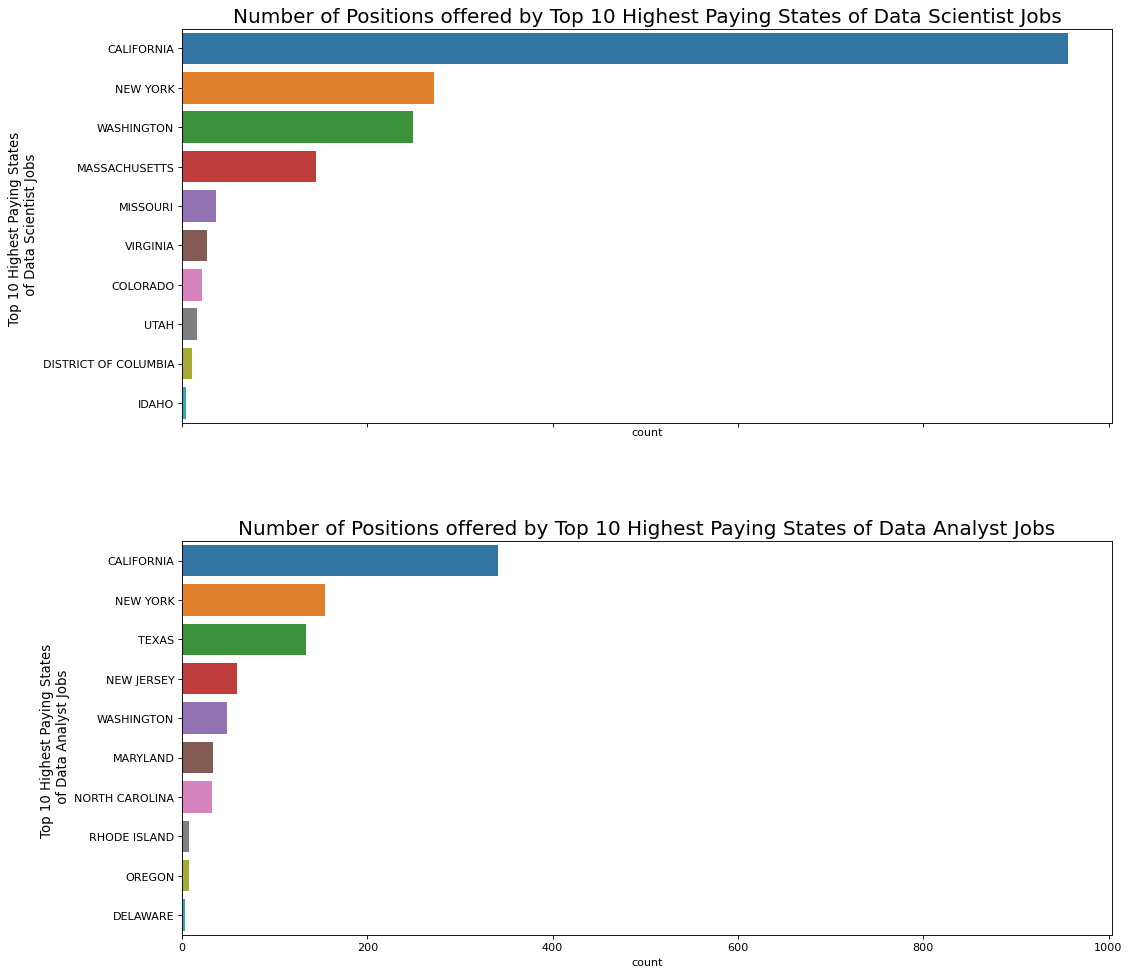

In [77]:
#count_order1 = df_state_top_pay['State'].value_counts().sort_values(ascending=False).index
count_order1 = ds_state_top_pay['State'].value_counts().sort_values(ascending=False).index
count_order2 = da_state_top_pay['State'].value_counts().sort_values(ascending=False).index

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15), dpi= 80, sharex=True)
sns.countplot(y='State', data = ds_state_top_pay, order=count_order1, ax=ax1)
sns.countplot(y='State', data = da_state_top_pay, order=count_order2, ax=ax2)

ax1.set_title('Number of Positions offered by Top 10 Highest Paying States of Data Scientist Jobs', fontsize = 18)
ax2.set_title('Number of Positions offered by Top 10 Highest Paying States of Data Analyst Jobs', fontsize = 18)

ax1.set_ylabel('Top 10 Highest Paying States \n of Data Scientist Jobs',fontsize = 12)
ax2.set_ylabel('Top 10 Highest Paying States \n of Data Analyst Jobs',fontsize = 12)

fig.subplots_adjust(hspace=.3)
plt.show()


#### 3.1.8 Top 10 Highest Paying Cities

In [78]:
#df_city_top_pay_stats = df.groupby('City')['BaseSalary'].agg(['count','mean','median','max','min','std'])
#df_city_top_pay_stats = df_city_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
#temp1 = df_city_top_pay_stats['City']

ds_city_top_pay_stats = ds.groupby('City')['BaseSalary'].agg(['count','mean','median','max','min','std'])
ds_city_top_pay_stats = ds_city_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
temp2 = ds_city_top_pay_stats['City']

da_city_top_pay_stats = da.groupby('City')['BaseSalary'].agg(['count','mean','median','max','min','std'])
da_city_top_pay_stats = da_city_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
temp3 = da_city_top_pay_stats['City']

temp = pd.DataFrame(list(zip(temp2.to_list(),temp3.to_list())), 
                      columns=['Top 10 Highest Paying Cities for Data Scientist Jobs',
                               'Top 10 Highest Paying Cities for Data Analyst Jobs'])
temp.index = np.arange(1, len(temp)+1)
temp

Top 10 Highest Paying Cities for Data Scientist Jobs  \
1                                           SUITE 250     
2                                              MALDEN     
3                                              ORANGE     
4                                         CULVER CITY     
5                                          CALIFORNIA     
6                                              NOVATO     
7                                           CUPERTINO     
8                                      EAST PALO ALTO     
9                                          MENLO PARK     
10                                         TITUSVILLE     

   Top 10 Highest Paying Cities for Data Analyst Jobs  
1                                              WILTON  
2                                           GWYNN OAK  
3                                            KIRKLAND  
4                                             WARWICK  
5                                         DOWNINGTOWN  
6                                          MENLO PARK  
7                                        SANTA MONICA  
8                                     NORTH ARLINGTON  
9                                       SANTA BARBARA  
10                                             ISELIN

#### 3.1.9 Average Salary of Top 10 Highest Paying Cities

In [79]:
# let's find top pay emp and their pay stats
#df_city_top_pay_stats = df.groupby('City')['BaseSalary'].agg(['mean','max','min']).round(2)
#df_city_top_pay_stats = df_city_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
#df_city_top_pay_stats = df_city_top_pay_stats.rename(columns={'City':'Top 10 Highest Paying Cities'})
#df_city_top_pay_stats.index = np.arange(1, len(df_city_top_pay_stats)+1)

ds_city_top_pay_stats = ds.groupby('City')['BaseSalary'].agg(['mean','max','min']).round(2)
ds_city_top_pay_stats = ds_city_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
ds_city_top_pay_stats = ds_city_top_pay_stats.rename(columns={'City':'Top 10 Highest Paying Cities for Data Scientist and Data Scientist Jobs'})
ds_city_top_pay_stats.index = np.arange(1, len(ds_city_top_pay_stats)+1)

da_city_top_pay_stats = da.groupby('City')['BaseSalary'].agg(['mean','max','min']).round(2)
da_city_top_pay_stats = da_city_top_pay_stats.sort_values(by='mean',ascending=False).head(10).reset_index()
da_city_top_pay_stats = da_city_top_pay_stats.rename(columns={'City':'Top 10 Highest Paying Cities for Data Scientist and Data Analyst Jobs'})
da_city_top_pay_stats.index = np.arange(1, len(da_city_top_pay_stats)+1)

multi_table([ds_city_top_pay_stats,da_city_top_pay_stats])

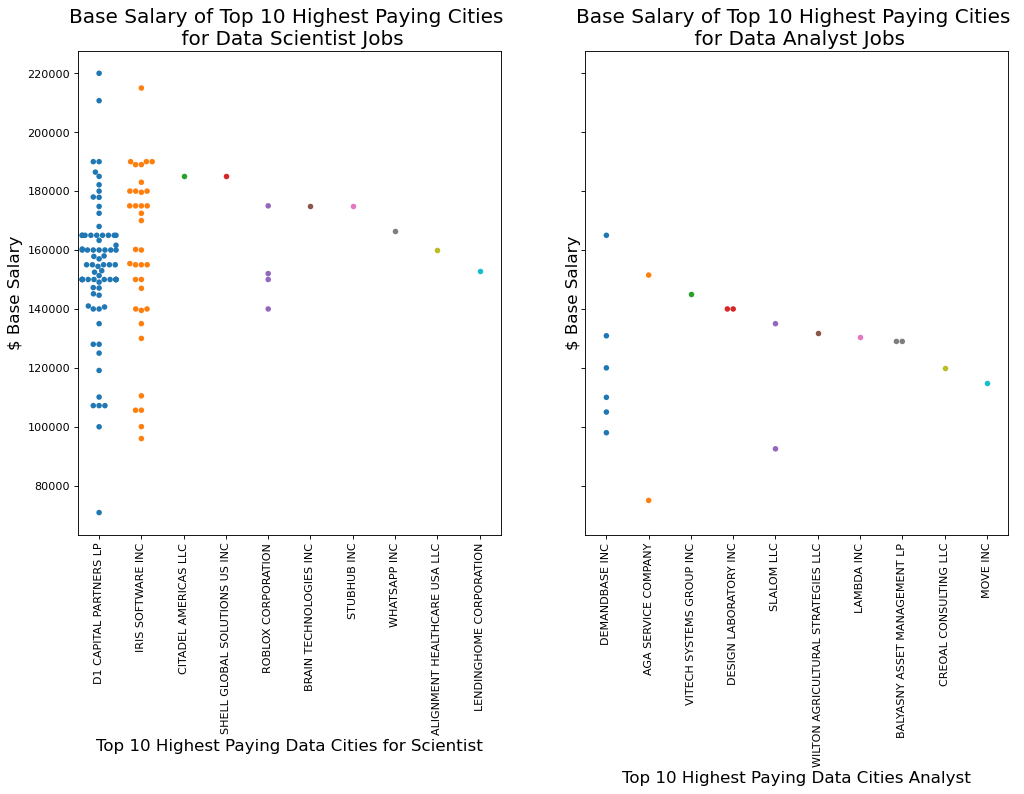

In [110]:
#prepare data
#df_city_top_pay_filter = df_city_top_pay_stats.iloc[:,0]
#df_city_top_pay=df[df.City.isin(df_city_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

ds_city_top_pay_filter = ds_city_top_pay_stats.iloc[:,0]
ds_city_top_pay=ds[ds.City.isin(ds_city_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

da_city_top_pay_filter = da_city_top_pay_stats.iloc[:,0]
da_city_top_pay=da[da.City.isin(da_city_top_pay_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

#-----------------------

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8), sharey= True, dpi= 80)

sns.swarmplot(x='City', y='BaseSalary', dodge = True, data = ds_city_top_pay, ax=ax1)
sns.swarmplot(x='City', y='BaseSalary', dodge = True, data = da_city_top_pay, ax=ax2)

ax1.set_title("Base Salary of Top 10 Highest Paying Cities \n for Data Scientist Jobs", fontsize=18)
ax2.set_title("Base Salary of Top 10 Highest Paying Cities \n for Data Analyst Jobs", fontsize=18)

ax1.set_xlabel('Top 10 Highest Paying Data Cities for Scientist',fontsize = 15)
ax2.set_xlabel('Top 10 Highest Paying Data Cities Analyst',fontsize = 15)

ax1.set_ylabel('$ Base Salary',fontsize = 15)
ax2.set_ylabel('$ Base Salary',fontsize = 15)


ax1.set_xticklabels(ds_emp_top_pay_filter.to_list(), rotation=90)
ax2.set_xticklabels(da_emp_top_pay_filter.to_list(), rotation=90)
fig.subplots_adjust(hspace=.5)
plt.show()

#### 3.1.10  Number of Hiring by Top 10 Highest Paying Cities

In [81]:
#print('Number of Positions offered by Top 10 Highest Paying Cities are:',len(df_city_top_pay),'positions')
print('Number of Positions offered by Top 10 Highest Paying Cities of Data Scientist Jobs are:',len(ds_city_top_pay),'positions')
print('Number of Positions offered by Top 10 Highest Paying Cities of Data Analyst Jobs are:',len(da_city_top_pay),'positions')

#df_city_top_pay_count = df.groupby('City')['BaseSalary'].agg(['count','mean'])
#df_city_top_pay_count = (df_city_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
#df_city_top_pay_count = df_city_top_pay_count.iloc[:,0:2].rename(columns={'City':'Top 10 Highest Paying Cities','count': 'Number of Positions', 'mean':'Average Base Salary'})
#df_city_top_pay_count.index = np.arange(1, len(df_city_top_pay_count)+1)

ds_city_top_pay_count = ds.groupby('City')['BaseSalary'].agg(['count','mean'])
ds_city_top_pay_count = (ds_city_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
ds_city_top_pay_count = ds_city_top_pay_count.iloc[:,0:2].rename(columns={'City':'Top 10 Highest Paying Cities of Data Analyst Jobs','count': 'Number of Positions', 'mean':'Average Base Salary'})
ds_city_top_pay_count.index = np.arange(1, len(ds_city_top_pay_count)+1)

da_city_top_pay_count = da.groupby('City')['BaseSalary'].agg(['count','mean'])
da_city_top_pay_count = (da_city_top_pay_count.sort_values(by='mean',ascending=False).head(10)).sort_values('count',ascending=False).reset_index()
da_city_top_pay_count = da_city_top_pay_count.iloc[:,0:2].rename(columns={'City':'Top 10 Highest Paying Cities of Data Analyst Jobs','count': 'Number of Positions', 'mean':'Average Base Salary'})
da_city_top_pay_count.index = np.arange(1, len(da_city_top_pay_count)+1)

multi_table([ds_city_top_pay_count,da_city_top_pay_count])

Number of Positions offered by Top 10 Highest Paying Cities of Data Scientist Jobs are: 123 positions
Number of Positions offered by Top 10 Highest Paying Cities of Data Analyst Jobs are: 19 positions


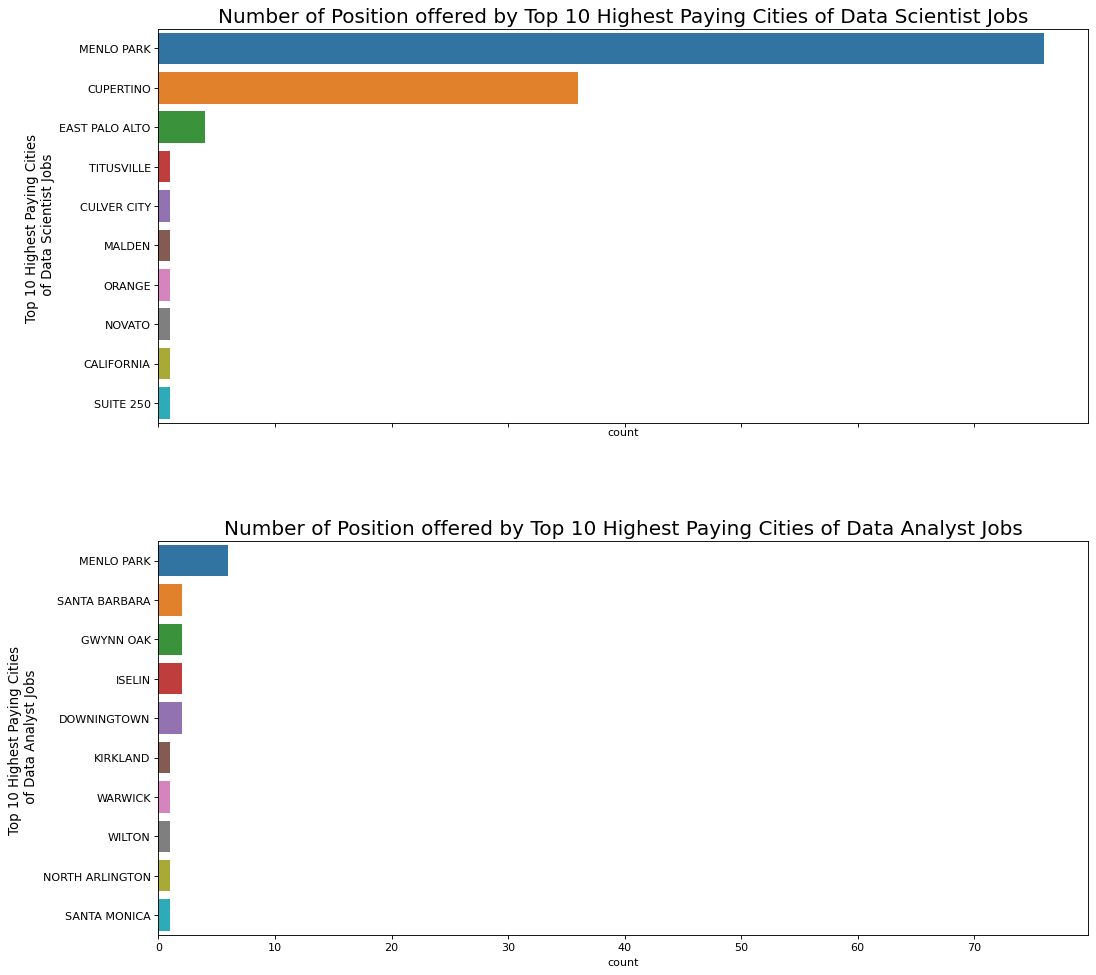

In [82]:
#count_order1 = df_city_top_pay['City'].value_counts().sort_values(ascending=False).index
count_order1 = ds_city_top_pay['City'].value_counts().sort_values(ascending=False).index
count_order2 = da_city_top_pay['City'].value_counts().sort_values(ascending=False).index

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15), dpi= 80, sharex=True)
#sns.countplot(y='City', data = df_city_top_pay, order=count_order1, ax=ax1)
sns.countplot(y='City', data = ds_city_top_pay, order=count_order1, ax=ax1)
sns.countplot(y='City', data = da_city_top_pay, order=count_order2, ax=ax2)

#ax1.set_title('Number of Position offered by Top 10 Highest Paying Cities', fontsize = 18)
ax1.set_title('Number of Position offered by Top 10 Highest Paying Cities of Data Scientist Jobs', fontsize = 18)
ax2.set_title('Number of Position offered by Top 10 Highest Paying Cities of Data Analyst Jobs', fontsize = 18)

#ax1.set_ylabel('Top 10 Highest Paying Cities', fontsize = 12)
ax1.set_ylabel('Top 10 Highest Paying Cities \n of Data Scientist Jobs',fontsize = 12)
ax2.set_ylabel('Top 10 Highest Paying Cities \n of Data Analyst Jobs',fontsize = 12)

fig.subplots_adjust(hspace=.3)
plt.show()

#### 3.1.11 Average Salary by Case Status

In [83]:
#temp1 = df.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Scientist and Data Analyst Jobs'})
temp2 = ds.groupby('CaseStatus')['BaseSalary'].agg(['mean','median','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Scientist Jobs'})
temp3 = da.groupby('CaseStatus')['BaseSalary'].agg(['mean','median','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Analyst Jobs'})

multi_table([temp2, temp3])

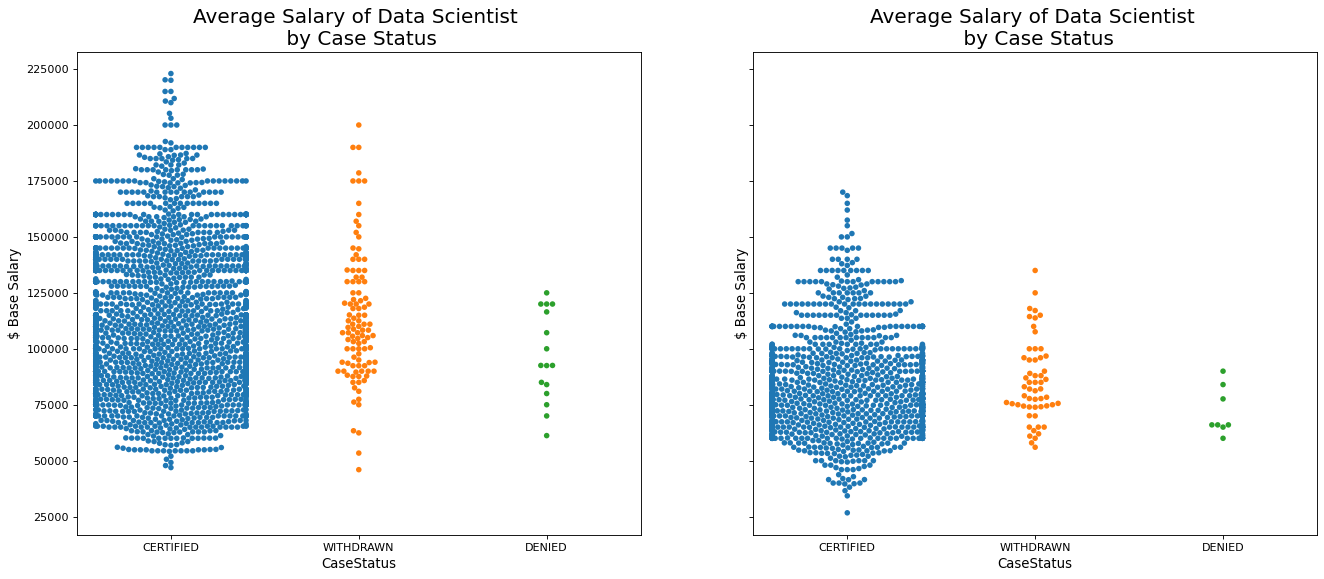

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8), dpi= 80, sharey=True)

sns.swarmplot(x='CaseStatus', y='BaseSalary', order=['CERTIFIED','WITHDRAWN','DENIED'], dodge = True, data = ds, ax=ax1)
sns.swarmplot(x='CaseStatus', y='BaseSalary', order=['CERTIFIED','WITHDRAWN','DENIED'], dodge = True, data = da, ax=ax2)

#ax1.set_title("Average Salary by Case Status", fontsize=18)
ax1.set_title("Average Salary of Data Scientist \n by Case Status", fontsize=18)
ax2.set_title("Average Salary of Data Scientist \n by Case Status", fontsize=18)

ax1.set_xlabel('CaseStatus',fontsize = 12)
ax2.set_xlabel('CaseStatus',fontsize = 12)

ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax2.set_ylabel('$ Base Salary',fontsize = 12)

fig.subplots_adjust(hspace=2)
plt.show()

#### 3.1.12 Average Salary of Top 10 Highest Paying Employers by Case Status

In [85]:
#temp1 = df_emp_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for All Jobs'})
temp2 = ds_emp_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Scientist Jobs'})
temp3 = da_emp_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Analyst Jobs'})

multi_table([temp2, temp3])

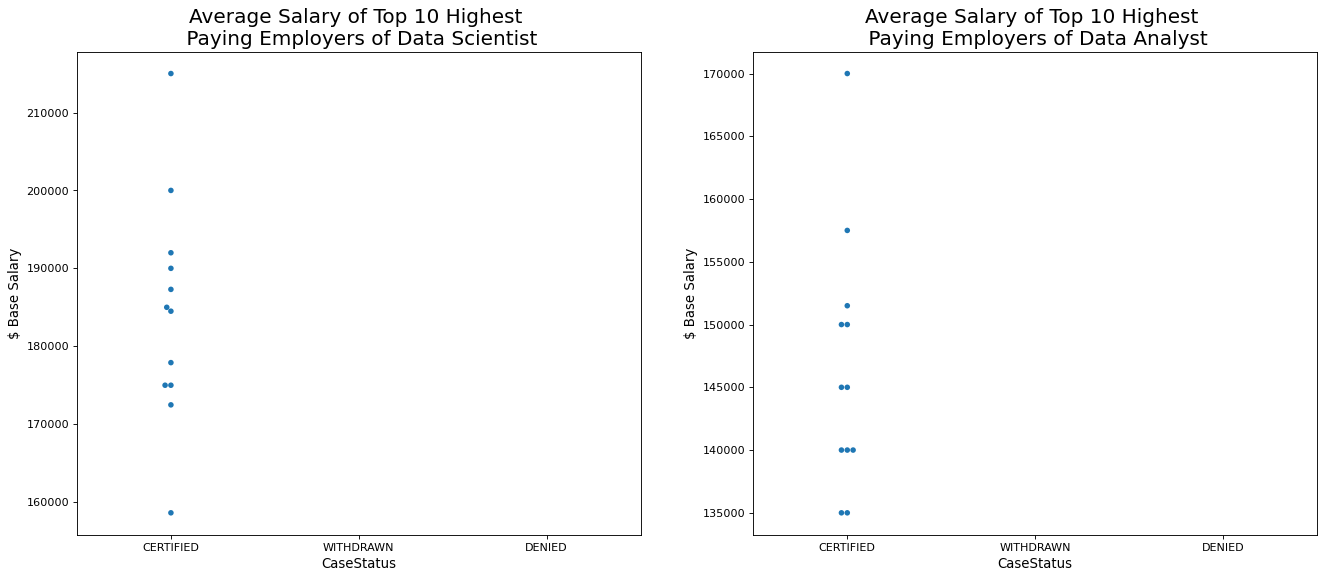

In [86]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8), dpi= 80, sharex=True)

sns.swarmplot(x='CaseStatus', y='BaseSalary', order=['CERTIFIED','WITHDRAWN','DENIED'], dodge = True, data = ds_emp_top_pay, ax=ax1)
sns.swarmplot(x='CaseStatus', y='BaseSalary', order=['CERTIFIED','WITHDRAWN','DENIED'], dodge = True, data = da_emp_top_pay, ax=ax2)

ax1.set_title("Average Salary of Top 10 Highest \n Paying Employers of Data Scientist", fontsize=18)
ax2.set_title("Average Salary of Top 10 Highest \n Paying Employers of Data Analyst", fontsize=18)

#ax1.set_xlabel('CaseStatus',fontsize = 12)
ax1.set_xlabel('CaseStatus',fontsize = 12)
ax2.set_xlabel('CaseStatus',fontsize = 12)
#ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax2.set_ylabel('$ Base Salary',fontsize = 12)

fig.subplots_adjust(hspace=2)
plt.show()

#### 3.1.13 Average Salary of Top 10 Highest Paying States by Case Status

In [87]:
#temp1 = df_state_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for All Jobs'})
temp2 = ds_state_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','median','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Scientist Jobs'})
temp3 = da_state_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','median','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Analyst Jobs'})

multi_table([temp2, temp3])

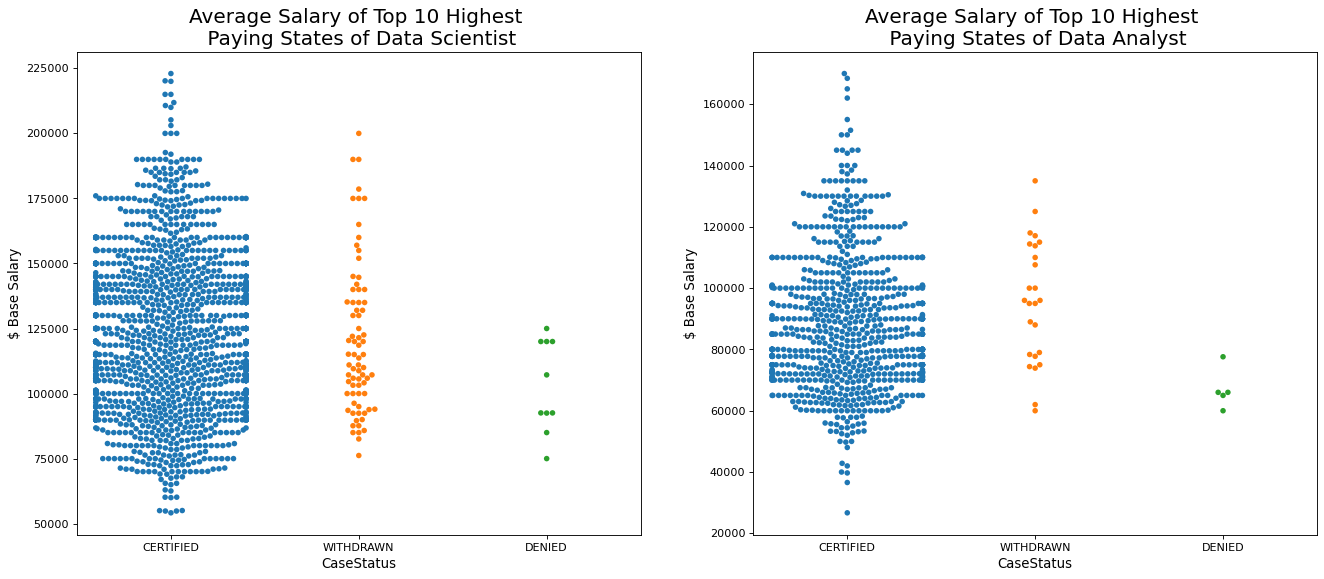

In [88]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8), dpi= 80, sharex=True)

#sns.swarmplot(x='CaseStatus', y='BaseSalary', dodge = True, order=['CERTIFIED','WITHDRAWN','DENIED'], data = df_state_top_pay, ax=ax1)
sns.swarmplot(x='CaseStatus', y='BaseSalary', order=['CERTIFIED','WITHDRAWN','DENIED'], dodge = True, data = ds_state_top_pay, ax=ax1)
sns.swarmplot(x='CaseStatus', y='BaseSalary', order=['CERTIFIED','WITHDRAWN','DENIED'], dodge = True, data = da_state_top_pay, ax=ax2)

#ax1.set_title("Average Salary of Top 10 Highest \n Paying States", fontsize=18)
ax1.set_title("Average Salary of Top 10 Highest \n Paying States of Data Scientist", fontsize=18)
ax2.set_title("Average Salary of Top 10 Highest \n Paying States of Data Analyst", fontsize=18)

#ax1.set_xlabel('CaseStatus',fontsize = 12)
ax1.set_xlabel('CaseStatus',fontsize = 12)
ax2.set_xlabel('CaseStatus',fontsize = 12)
#ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax2.set_ylabel('$ Base Salary',fontsize = 12)

fig.subplots_adjust(hspace=2)
plt.show()

#### 3.1.14 Average Salary of Top 10 Highest Paying Cities by Case Status

In [89]:
#temp1 = df_city_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Scientist and Data Analyst Jobs'})
temp2 = ds_city_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Scientist Jobs'})
temp3 = da_city_top_pay.groupby('CaseStatus')['BaseSalary'].agg(['mean','max','min']).round(2).reset_index().rename(columns={'CaseStatus':'Case Status for Data Analyst Jobs'})

multi_table([temp2, temp3])

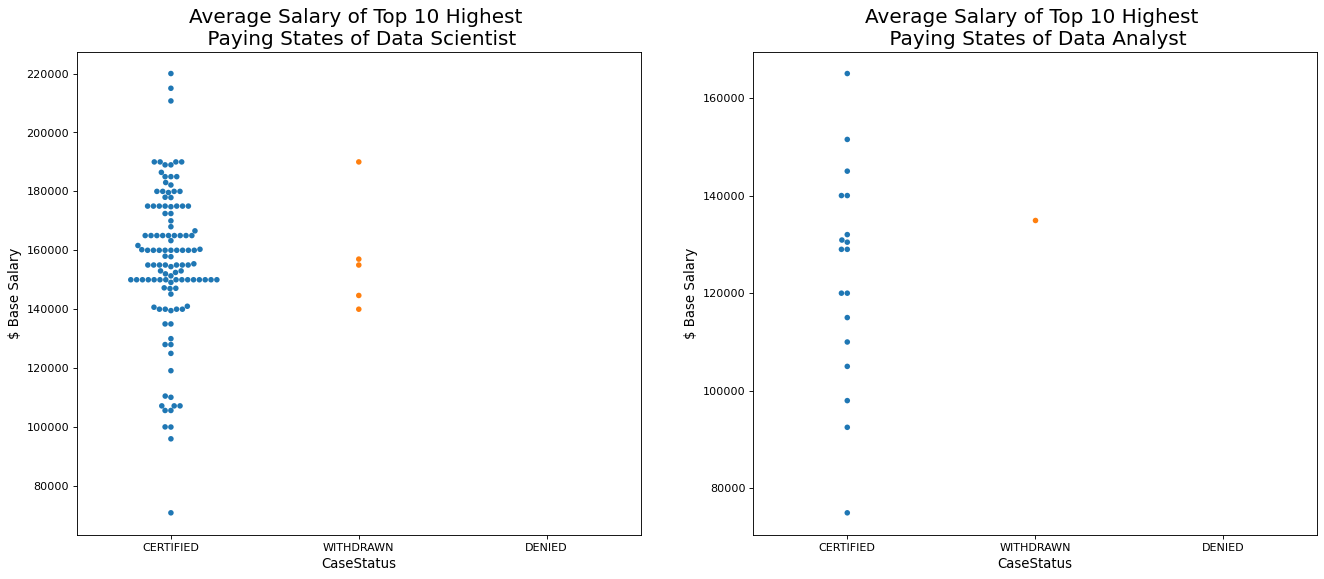

In [90]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8), dpi= 80, sharex=True)

#sns.swarmplot(x='CaseStatus', y='BaseSalary', dodge = True, order=['CERTIFIED','WITHDRAWN','DENIED'], data = df_city_top_pay, ax=ax1)
sns.swarmplot(x='CaseStatus', y='BaseSalary', order=['CERTIFIED','WITHDRAWN','DENIED'], dodge = True, data = ds_city_top_pay, ax=ax1)
sns.swarmplot(x='CaseStatus', y='BaseSalary', order=['CERTIFIED','WITHDRAWN','DENIED'], dodge = True, data = da_city_top_pay, ax=ax2)

#ax1.set_title("Average Salary of Top 10 Highest \n Paying States", fontsize=18)
ax1.set_title("Average Salary of Top 10 Highest \n Paying States of Data Scientist", fontsize=18)
ax2.set_title("Average Salary of Top 10 Highest \n Paying States of Data Analyst", fontsize=18)

#ax1.set_xlabel('CaseStatus',fontsize = 12)
ax1.set_xlabel('CaseStatus',fontsize = 12)
ax2.set_xlabel('CaseStatus',fontsize = 12)
#ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax2.set_ylabel('$ Base Salary',fontsize = 12)

fig.subplots_adjust(hspace=2)
plt.show()

### 3.2 Location Analysis

#### 3.2.1  Location of Top 10 Highest Hiring Employers

In [91]:
# let's find top pay emp and their pay stats
#df_emp_top_hire_stats = df.groupby('Employer')['BaseSalary'].agg(['count'])
#df_emp_top_hire_stats = df_emp_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
#df_emp_top_hire_stats = df_emp_top_hire_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Hiring Employers for All Jobs'})
#df_emp_top_hire_stats.index = np.arange(1, len(df_emp_top_hire_stats)+1)

ds_emp_top_hire_stats = ds.groupby('Employer')['BaseSalary'].agg(['count'])
ds_emp_top_hire_stats = ds_emp_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
ds_emp_top_hire_stats = ds_emp_top_hire_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Hiring Employers for Data Scientist Jobs'})
ds_emp_top_hire_stats.index = np.arange(1, len(ds_emp_top_hire_stats)+1)

da_emp_top_hire_stats = da.groupby('Employer')['BaseSalary'].agg(['count'])
da_emp_top_hire_stats = da_emp_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
da_emp_top_hire_stats = da_emp_top_hire_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Hiring Employers for Data Analyst Jobs'})
da_emp_top_hire_stats.index = np.arange(1, len(da_emp_top_hire_stats)+1)

multi_table([ds_emp_top_hire_stats,da_emp_top_hire_stats])

Now let's see where are they located

In [92]:
#prepare data
#df_emp_top_hire_filter = df_emp_top_hire_stats.iloc[:,0]
#df_emp_top_hire=df[df.Employer.isin(df_emp_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

#-----
#orange = sns.light_palette("orange", as_cmap=True)
#temp1 = df_emp_top_hire[['Employer','State','City']].rename(columns={'Employer':'Top 10 Highest Hiring Employers for All Jobs'})
#(pd.crosstab(index=temp1['State'], columns = [temp1['Top 10 Highest Hiring Employers for All Jobs']],margins=True, margins_name="Total")).sort_values(by='Total',ascending=False).style.background_gradient(cmap=orange)


In [93]:
ds_emp_top_hire_filter = ds_emp_top_hire_stats.iloc[:,0]
ds_emp_top_hire=ds[ds.Employer.isin(ds_emp_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

temp2 = ds_emp_top_hire[['Employer','State','City']].rename(columns={'Employer':'Top 10 Highest Hiring Employers for Data Scientist Jobs'})
(pd.crosstab(index=temp2['State'], columns = [temp2['Top 10 Highest Hiring Employers for Data Scientist Jobs']],margins=True, margins_name="Total")).sort_values(by='Total',ascending=False).style.background_gradient(cmap=orange)

In [94]:
da_emp_top_hire_filter = da_emp_top_hire_stats.iloc[:,0]
da_emp_top_hire=da[da.Employer.isin(da_emp_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

temp3 = da_emp_top_hire[['Employer','State','City']].rename(columns={'Employer':'Top 10 Highest Hiring Employers for Data Analyst Jobs'})
(pd.crosstab(index=temp3['State'], columns = [temp3['Top 10 Highest Hiring Employers for Data Analyst Jobs']],margins=True, margins_name="Total")).sort_values(by='Total',ascending=False).style.background_gradient(cmap=orange)

#### 3.2.2 Location of Top 10 Highest Hiring States

In [95]:
# let's find top hiring states
#df_state_top_hire_stats = df.groupby('State')['BaseSalary'].agg(['count'])
#df_state_top_hire_stats = df_state_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
#df_state_top_hire_stats = df_state_top_hire_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Hiring Employers for All Jobs'})
#df_state_top_hire_stats.index = np.arange(1, len(df_state_top_hire_stats)+1)

ds_state_top_hire_stats = ds.groupby('State')['BaseSalary'].agg(['count'])
ds_state_top_hire_stats = ds_state_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
ds_state_top_hire_stats = ds_state_top_hire_stats.iloc[:,0:4].rename(columns={'State':'Top 10 Highest Hiring Employers for Data Scientist Jobs'})
ds_state_top_hire_stats.index = np.arange(1, len(ds_state_top_hire_stats)+1)

da_state_top_hire_stats = da.groupby('State')['BaseSalary'].agg(['count'])
da_state_top_hire_stats = da_state_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
da_state_top_hire_stats = da_state_top_hire_stats.iloc[:,0:4].rename(columns={'State':'Top 10 Highest Hiring Employers for Data Analyst Jobs'})
da_state_top_hire_stats.index = np.arange(1, len(da_state_top_hire_stats)+1)

multi_table([ds_state_top_hire_stats,da_state_top_hire_stats])

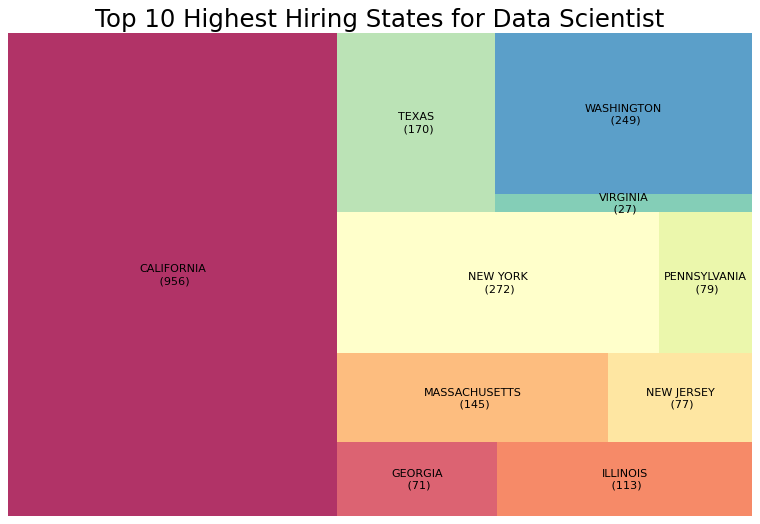

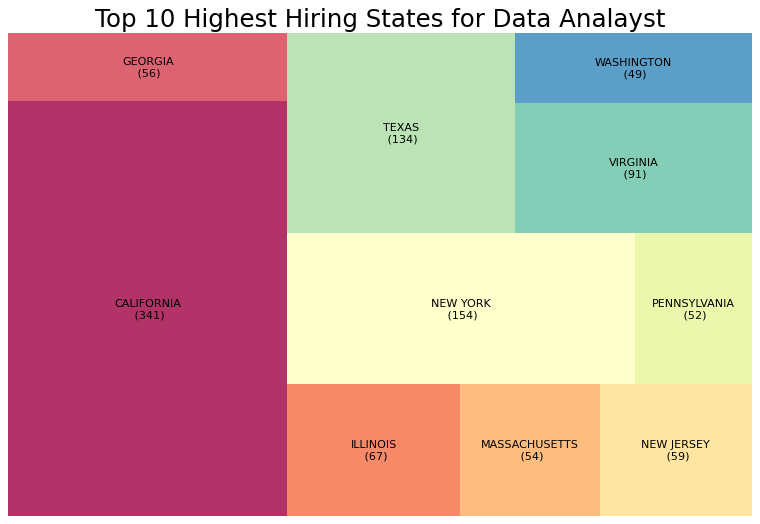

In [96]:
#prepare data
#df_state_top_hire_filter = df_state_top_hire_stats.iloc[:,0]
#df_state_top_hire=df[df.State.isin(df_state_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

ds_state_top_hire_filter = df_state_top_hire_stats.iloc[:,0]
ds_state_top_hire=ds[ds.State.isin(ds_state_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

da_state_top_hire_filter = df_state_top_hire_stats.iloc[:,0]
da_state_top_hire=da[da.State.isin(da_state_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()


#----------------------------
temp_raw2 = ds_state_top_hire
temp2 = temp_raw2.groupby('State').size().reset_index(name='counts')[:10]
labels2 = temp2.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes2 = temp2['counts'].values.tolist()
colors2 = [plt.cm.Spectral(i/float(len(labels2))) for i in range(len(labels2))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes2, label=labels2, color=colors2, alpha=.8)

# Decorate
plt.title('Top 10 Highest Hiring States for Data Scientist', fontsize=22)
plt.axis('off')
plt.show()

#-----------------------------
temp_raw3 = da_state_top_hire
temp3 = temp_raw3.groupby('State').size().reset_index(name='counts')[:10]
labels3 = temp3.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes3 = temp3['counts'].values.tolist()
colors3 = [plt.cm.Spectral(i/float(len(labels3))) for i in range(len(labels3))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes3, label=labels3, color=colors3, alpha=.8)

# Decorate
plt.title('Top 10 Highest Hiring States for Data Analayst', fontsize=22)
plt.axis('off')
plt.show()

#### 3.2.3 Location of Top 10 Highest Hiring Cities

In [97]:
# let's find top hiring cities
#df_city_top_hire_stats = df.groupby('City')['BaseSalary'].agg(['count'])
#df_city_top_hire_stats = df_city_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
#df_city_top_hire_stats = df_city_top_hire_stats.iloc[:,0:4].rename(columns={'Employer':'Top 10 Highest Hiring City for All Jobs'})
#df_city_top_hire_stats.index = np.arange(1, len(df_city_top_hire_stats)+1)

ds_city_top_hire_stats = ds.groupby('City')['BaseSalary'].agg(['count'])
ds_city_top_hire_stats = ds_city_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
ds_city_top_hire_stats = ds_city_top_hire_stats.iloc[:,0:4].rename(columns={'City':'Top 10 Highest Hiring Cities for Data Scientist'})
ds_city_top_hire_stats.index = np.arange(1, len(ds_city_top_hire_stats)+1)

da_city_top_hire_stats = da.groupby('City')['BaseSalary'].agg(['count'])
da_city_top_hire_stats = da_city_top_hire_stats.sort_values(by='count',ascending=False).head(10).reset_index()
da_city_top_hire_stats = da_city_top_hire_stats.iloc[:,0:4].rename(columns={'City':'Top 10 Highest Hiring Cities for Data Analyst'})
da_city_top_hire_stats.index = np.arange(1, len(da_city_top_hire_stats)+1)

multi_table([ds_city_top_hire_stats,da_city_top_hire_stats])

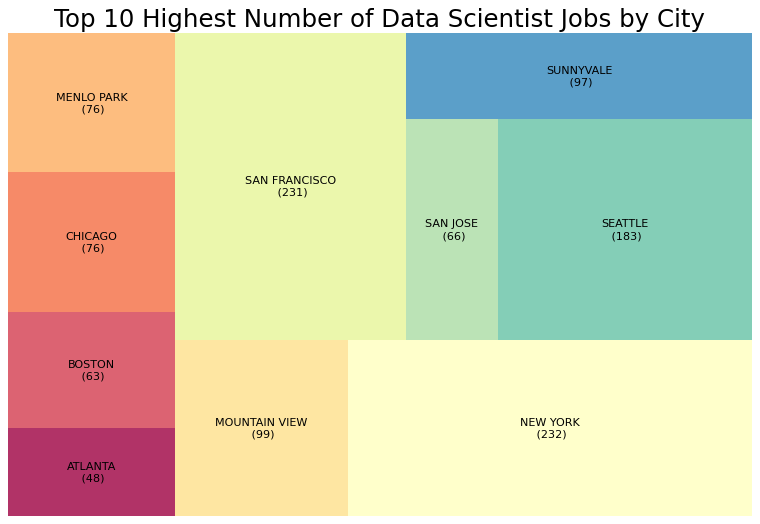

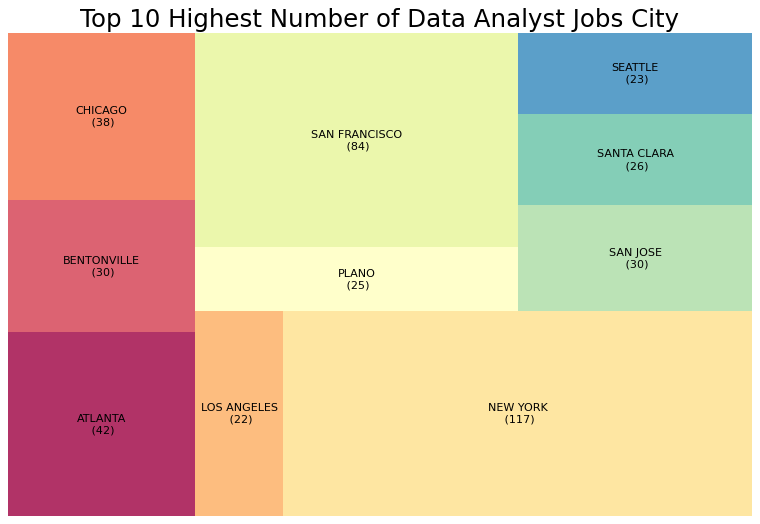

In [98]:
#prepare data
#df_city_top_hire_filter = df_city_top_hire_stats.iloc[:,0]
#df_city_top_hire=df[df.City.isin(df_city_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

ds_city_top_hire_filter = ds_city_top_hire_stats.iloc[:,0]
ds_city_top_hire=ds[ds.City.isin(ds_city_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

da_city_top_hire_filter = da_city_top_hire_stats.iloc[:,0]
da_city_top_hire=da[da.City.isin(da_city_top_hire_filter)].reset_index().sort_values(by='BaseSalary',ascending=False).reset_index()

#----------------------------
temp_raw2 = ds_city_top_hire
temp2 = temp_raw2.groupby('City').size().reset_index(name='counts')[:10]
labels2 = temp2.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes2 = temp2['counts'].values.tolist()
colors2 = [plt.cm.Spectral(i/float(len(labels2))) for i in range(len(labels2))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes2, label=labels2, color=colors2, alpha=.8)

# Decorate
plt.title('Top 10 Highest Number of Data Scientist Jobs by City', fontsize=22)
plt.axis('off')
plt.show()

#-----------------------------
temp_raw3 = da_city_top_hire
temp3 = temp_raw3.groupby('City').size().reset_index(name='counts')[:10]
labels3 = temp3.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes3 = temp3['counts'].values.tolist()
colors3 = [plt.cm.Spectral(i/float(len(labels3))) for i in range(len(labels3))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes3, label=labels3, color=colors3, alpha=.8)

# Decorate
plt.title('Top 10 Highest Number of Data Analyst Jobs City', fontsize=22)
plt.axis('off')
plt.show()

### 3.3 Case Status Analysis

#### 3.3.1 Top 10 Hiring States by Case Status

In [99]:
temp_ds=ds_state_top_pay.rename(columns={'State':'Top 10 States of Hiring Data Scientist'})
temp_da=da_state_top_pay.rename(columns={'State':'Top 10 States of Hiring Data Analyst'})

temp1 = (pd.crosstab(index=temp_ds['Top 10 States of Hiring Data Scientist'], columns = [temp_ds['CaseStatus']])).sort_values(by=['CERTIFIED'],ascending=False)[:10]
temp2 = (pd.crosstab(index=temp_da['Top 10 States of Hiring Data Analyst'], columns = [temp_da['CaseStatus']])).sort_values(by=['CERTIFIED'],ascending=False)[:10]

multi_table([temp1,temp2])

#### 3.3.2 Average Salary of Top 10 Hiring States by Case Status

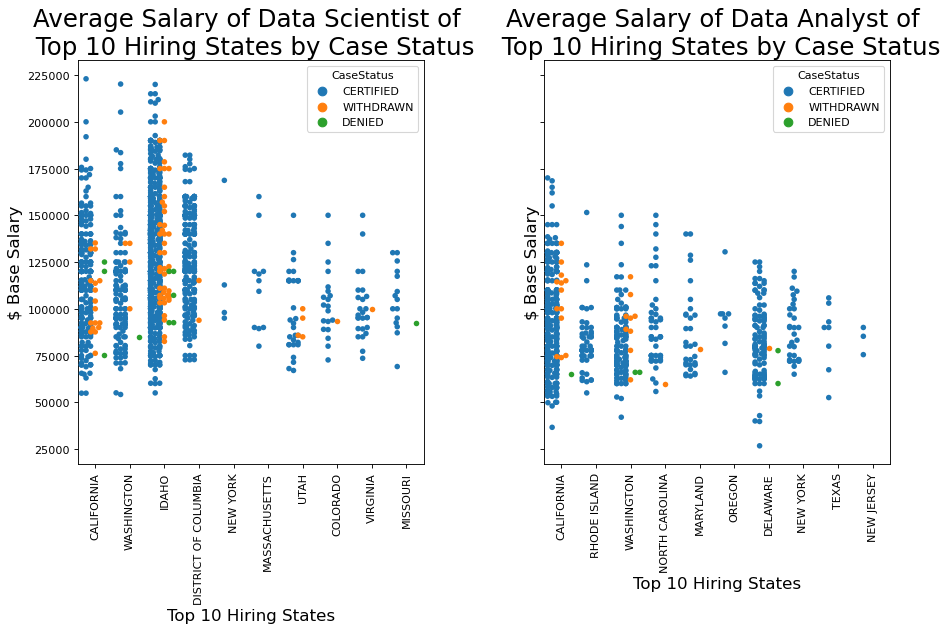

In [112]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8), dpi= 80, sharey=True)

#sns.swarmplot(x='CaseStatus', y='BaseSalary', dodge = True, order=['CERTIFIED','WITHDRAWN','DENIED'], data = df_city_top_pay, ax=ax1)
sns.swarmplot(x='State', y='BaseSalary', hue = 'CaseStatus', dodge = True, data = ds_state_top_pay, ax=ax1)
sns.swarmplot(x='State', y='BaseSalary', hue = 'CaseStatus', dodge = True, data = da_state_top_pay, ax=ax2)

#ax1.set_title("Average Salary of Top 10 Highest \n Paying States", fontsize=18)
ax1.set_title("Average Salary of Data Scientist of \n Top 10 Hiring States by Case Status", fontsize=22)
ax2.set_title("Average Salary of Data Analyst of \n Top 10 Hiring States by Case Status", fontsize=22)

#ax1.set_xlabel('CaseStatus',fontsize = 12)
ax1.set_xlabel('Top 10 Hiring States',fontsize = 15)
ax2.set_xlabel('Top 10 Hiring States',fontsize = 15)
#ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax1.set_ylabel('$ Base Salary',fontsize = 15)
ax2.set_ylabel('$ Base Salary',fontsize = 15)

ax1.set_xticklabels(ds_state_top_pay_filter.to_list(), rotation=90)
ax2.set_xticklabels(da_state_top_pay_filter.to_list(), rotation=90)
fig.tight_layout()
#fig.subplots_adjust(hspace=5)
plt.show()

#### 3.3.3 Average Salary of Top 10 Hiring Cities by Case Status

In [101]:
temp_ds=ds_city_top_hire.rename(columns={'City':'Top 10 Cities of Hiring Data Scientist'})
temp_da=da_city_top_hire.rename(columns={'City':'Top 10 Cities of Hiring Data Analyst'})

temp1 = (pd.crosstab(index=temp_ds['Top 10 Cities of Hiring Data Scientist'], columns = [temp_ds['CaseStatus']])).sort_values(by=['CERTIFIED'],ascending=False)[:10]
temp2 = (pd.crosstab(index=temp_da['Top 10 Cities of Hiring Data Analyst'], columns = [temp_da['CaseStatus']])).sort_values(by=['CERTIFIED'],ascending=False)[:10]

multi_table([temp1,temp2])

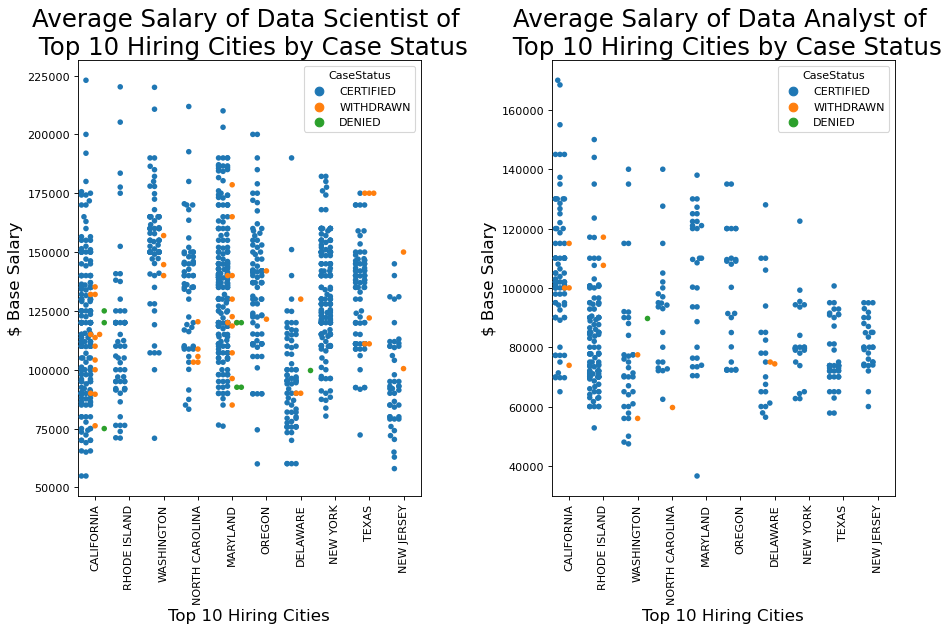

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,8), dpi= 80, sharex=True)

#sns.swarmplot(x='CaseStatus', y='BaseSalary', dodge = True, order=['CERTIFIED','WITHDRAWN','DENIED'], data = df_city_top_pay, ax=ax1)
sns.swarmplot(x='City', y='BaseSalary', hue = 'CaseStatus', dodge = True, data = ds_city_top_hire, ax=ax1)
sns.swarmplot(x='City', y='BaseSalary', hue = 'CaseStatus', dodge = True, data = da_city_top_hire, ax=ax2)

#ax1.set_title("Average Salary of Top 10 Highest \n Paying States", fontsize=18)
ax1.set_title("Average Salary of Data Scientist of \n Top 10 Hiring Cities by Case Status", fontsize=22)
ax2.set_title("Average Salary of Data Analyst of \n Top 10 Hiring Cities by Case Status", fontsize=22)

#ax1.set_xlabel('CaseStatus',fontsize = 12)
ax1.set_xlabel('Top 10 Hiring Cities',fontsize = 15)
ax2.set_xlabel('Top 10 Hiring Cities',fontsize = 15)
#ax1.set_ylabel('$ Base Salary',fontsize = 12)
ax1.set_ylabel('$ Base Salary',fontsize = 15)
ax2.set_ylabel('$ Base Salary',fontsize = 15)

ax1.set_xticklabels(ds_state_top_pay_filter.to_list(), rotation=90)
ax2.set_xticklabels(da_state_top_pay_filter.to_list(), rotation=90)
fig.tight_layout()
#fig.subplots_adjust(hspace=5)
plt.show()